* Imprted Packages

In [2]:
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, StandardScaler,MaxAbsScaler,Normalizer
import pickle

* Data Generation

In [3]:
id_1 = 7528 #first student id
id_2 = 7592 #second student id
id_3 = 7579 #third student id 
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="./data.csv" #data path
output_path="./your_data.csv" #output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
columns = selected_columns
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   

['relaxation', 'LDL', 'Cholesterol', 'HDL', 'fasting blood sugar', 'hearing(right)', 'hearing(left)', 'ALT', 'eyesight(right)', 'systolic']


* Split Data

In [4]:
# split
train_ratio = 0.70
valid_ratio = 0.15
test_ratio = 0.15
# split dataset into training set 70% and the remaining 30%
X_train, X_temp, y_train, y_temp = train_test_split(sample_df.drop(target_column, axis=1), sample_df[target_column], 
                                                    test_size=1 - train_ratio, random_state=42)
# then splitting the remaining X and Y into validation and dataset each 15%
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp,
                                                        test_size=test_ratio / (test_ratio + valid_ratio),
                                                        random_state=42)

# training dataset
training_data = X_train.assign(smoking=y_train.tolist())
valid_data = X_valid.assign(smoking=y_valid.tolist())
test_data = X_test.assign(smoking=y_test.tolist())
training_data.to_csv("./training_data.csv")

* Share Variables with other Notebooks

In [5]:
with open("shared_variables.pkl", "wb") as f:
    pickle.dump(columns, f)
    pickle.dump(X_train, f)
    pickle.dump(y_train, f)
    pickle.dump(X_test, f)
    pickle.dump(y_test, f)
    pickle.dump(X_valid, f)

* Data Analysis:

    * Univariate Analysis
        1. Data Description for each feature

In [4]:
training_data[columns].describe()

relaxation            LDL    Cholesterol            HDL  \
count  111479.000000  111479.000000  111479.000000  111479.000000   
mean       76.853318     114.588425     195.776505      55.855524   
std         9.002454      28.105938      28.427035      13.953620   
min        44.000000       1.000000      77.000000       9.000000   
25%        70.000000      95.000000     175.000000      45.000000   
50%        78.000000     114.000000     196.000000      54.000000   
75%        82.000000     133.000000     217.000000      64.000000   
max       133.000000    1660.000000     393.000000     136.000000   

       fasting blood sugar  hearing(right)  hearing(left)            ALT  \
count        111479.000000   111479.000000  111479.000000  111479.000000   
mean             98.317414        1.022991       1.023448      26.564178   
std              15.338854        0.149875       0.151323      18.526106   
min              46.000000        1.000000       1.000000       1.000000   
25%              90.000000        1.000000       1.000000      16.000000   
50%              96.000000        1.000000       1.000000      22.000000   
75%             103.000000        1.000000       1.000000      32.000000   
max             375.000000        2.000000       2.000000    2914.000000   

       eyesight(right)       systolic  
count    111479.000000  111479.000000  
mean          1.000727     122.451089  
std           0.389692      12.712299  
min           0.100000      77.000000  
25%           0.800000     114.000000  
50%           1.000000     121.000000  
75%           1.200000     130.000000  
max           9.900000     213.000000

2. Histogram plot, KDE plot with and without hue for each feature


PLots of relaxation Feature:


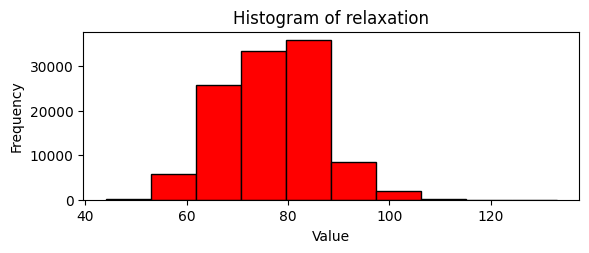

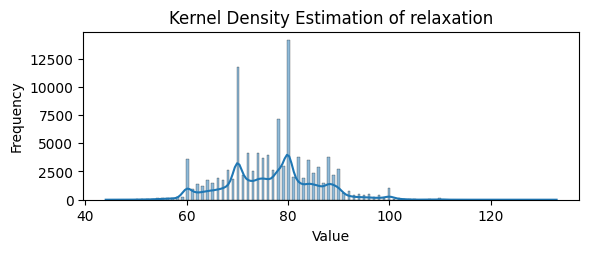

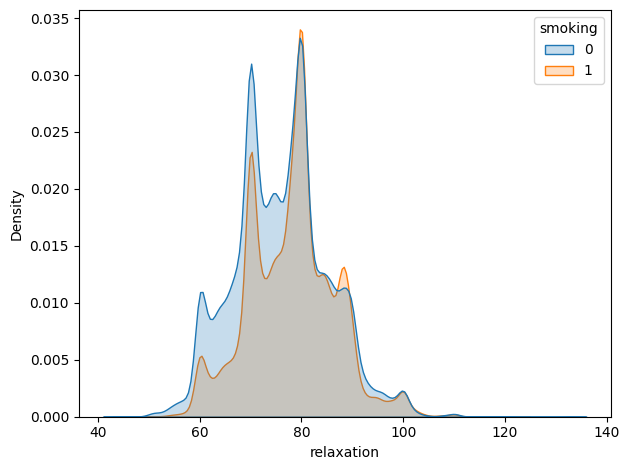


PLots of LDL Feature:


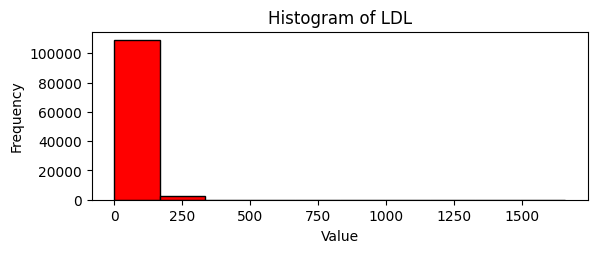

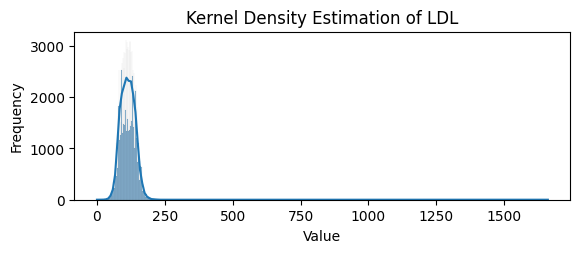

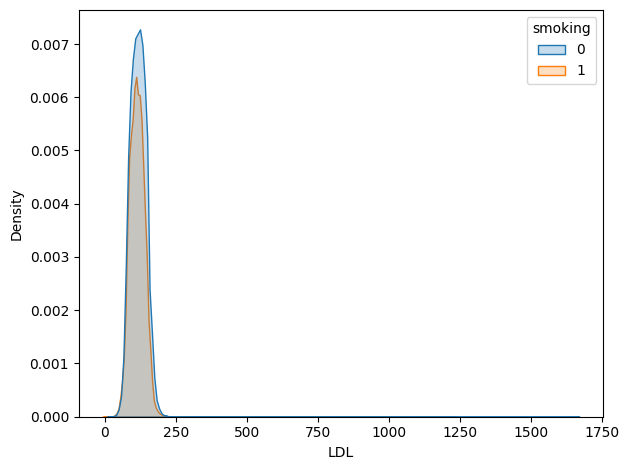


PLots of Cholesterol Feature:


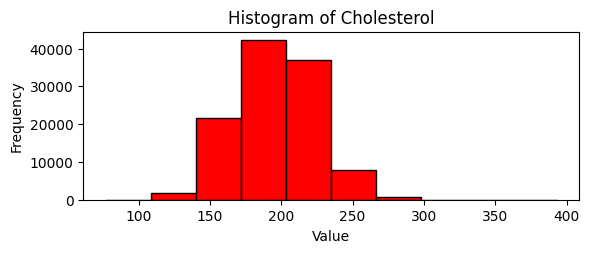

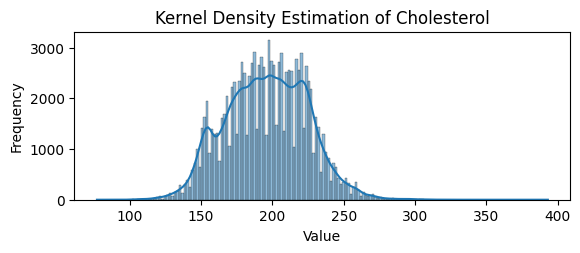

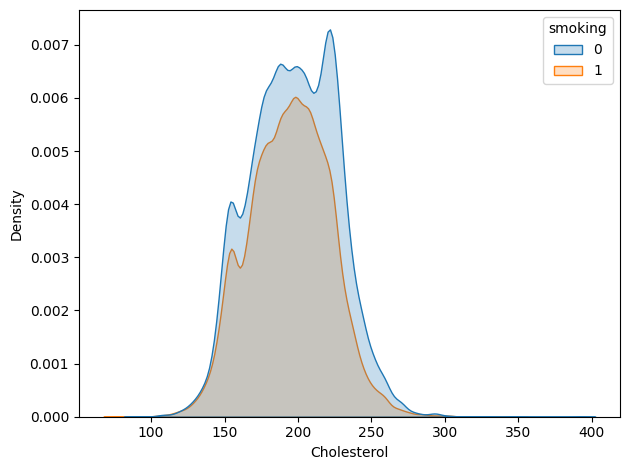


PLots of HDL Feature:


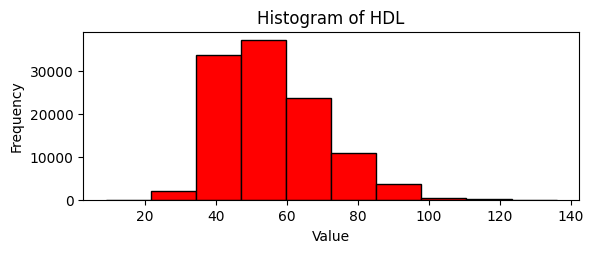

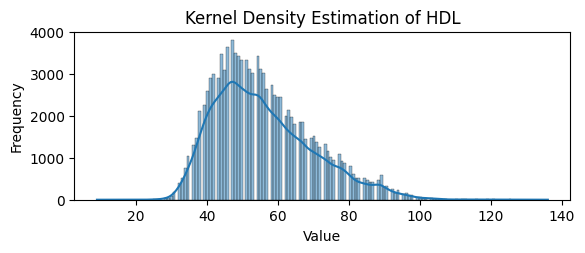

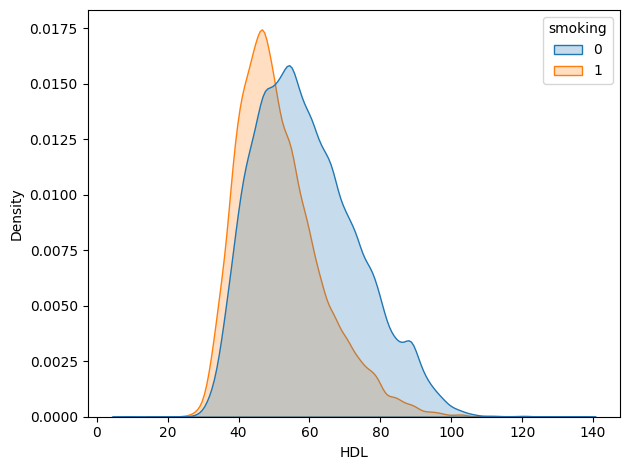


PLots of fasting blood sugar Feature:


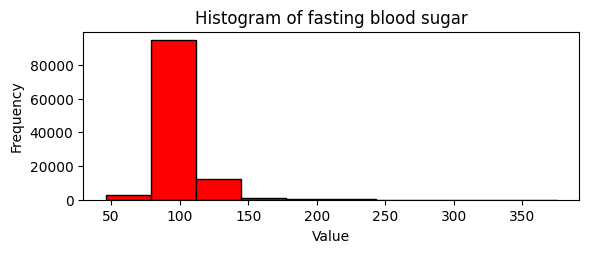

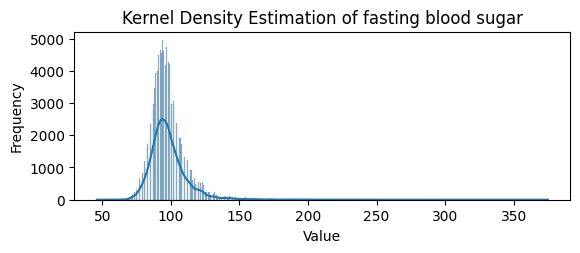

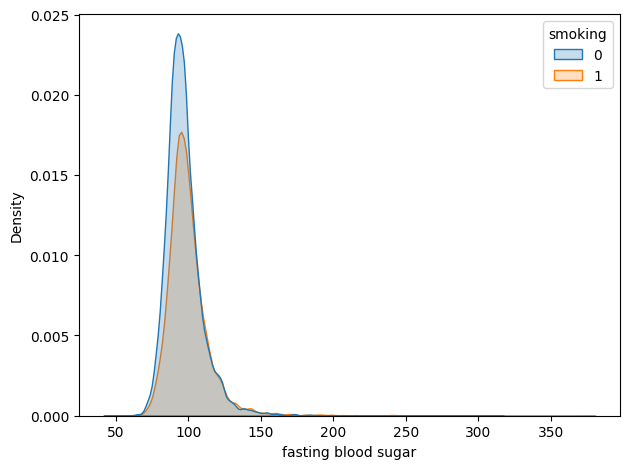


PLots of hearing(right) Feature:


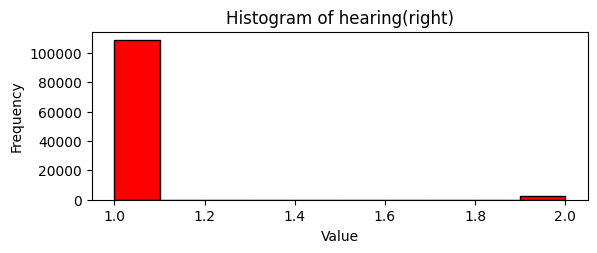

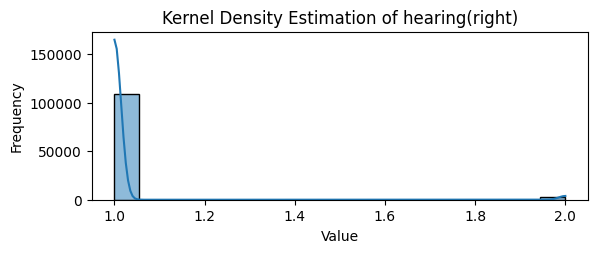

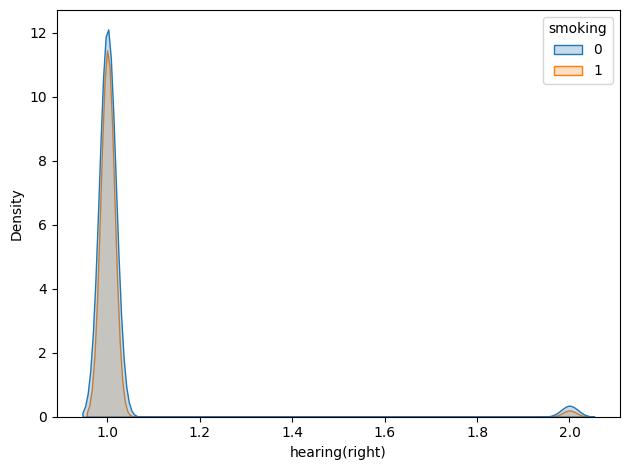


PLots of hearing(left) Feature:


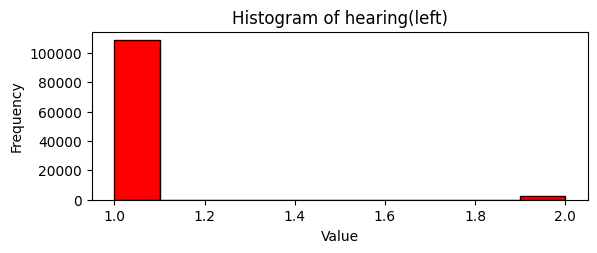

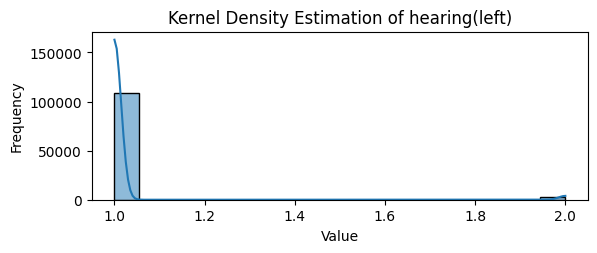

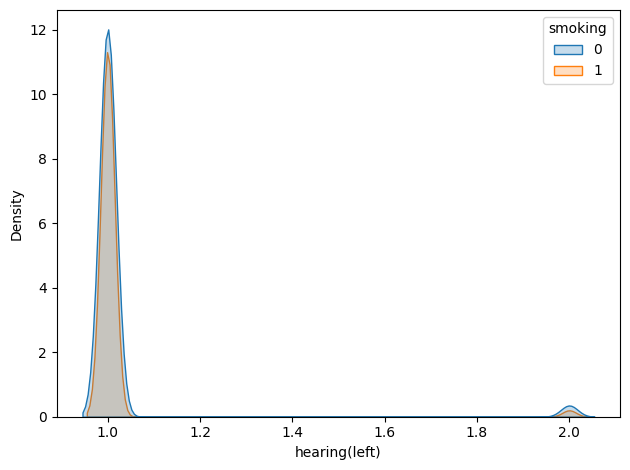


PLots of ALT Feature:


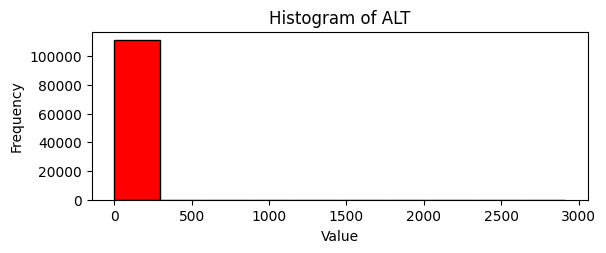

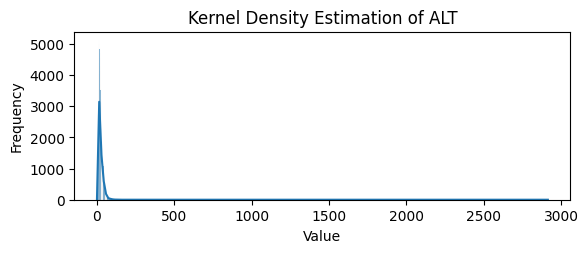

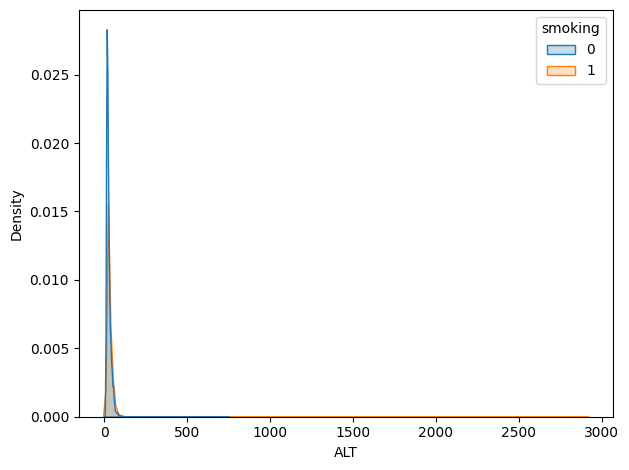


PLots of eyesight(right) Feature:


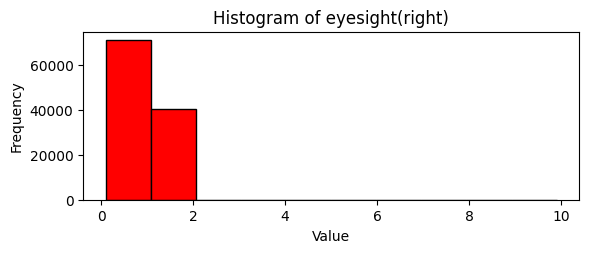

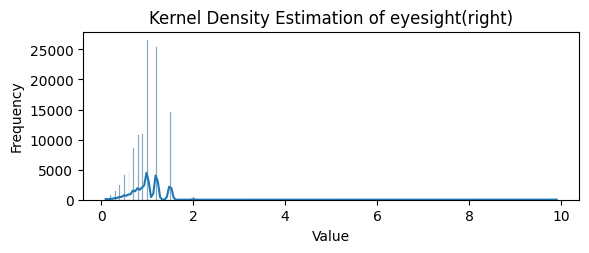

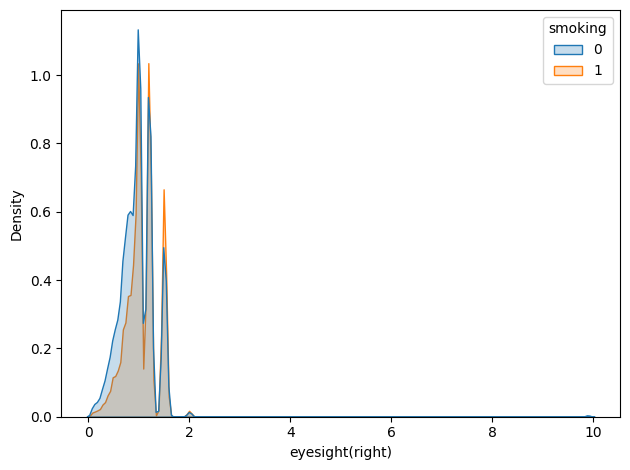


PLots of systolic Feature:


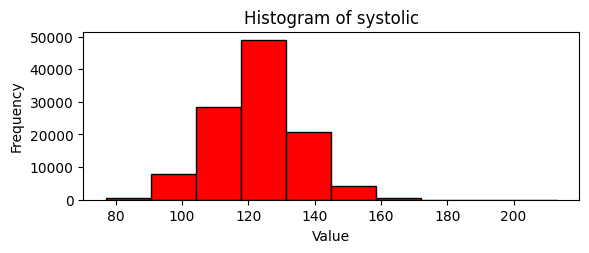

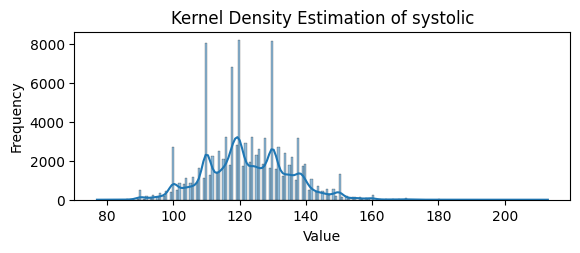

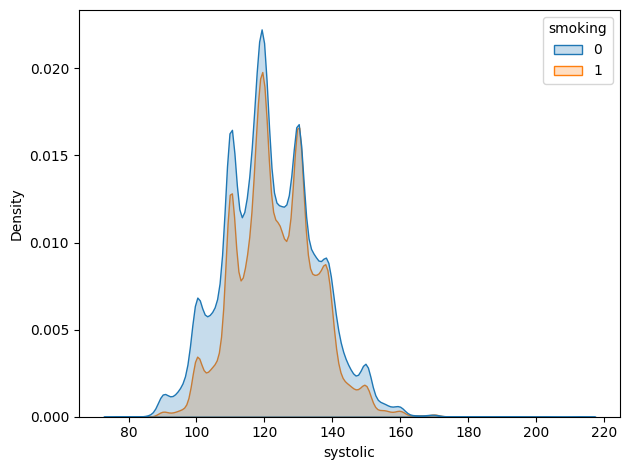

In [30]:
for i in range (0,len(columns)):
    column_for_analysis = columns[i]
    print(f'\nPLots of {column_for_analysis} Feature:')
    
    # Histogram
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.hist(X_train[column_for_analysis], bins=10, color='red', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_for_analysis}')
    
    # KDE plot
    plt.figure()
    plt.subplot(2, 1, 2)
    sns.histplot(X_train[column_for_analysis], kde=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Kernel Density Estimation of {column_for_analysis}')
    plt.figure()

    # KDE plots with Hue  
    sns.kdeplot(data=training_data, x=columns[i], hue=target_column, fill=True)
    #plt.figure()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

# Show the plot
    plt.show()

3. Plot Count for Discrete Variables

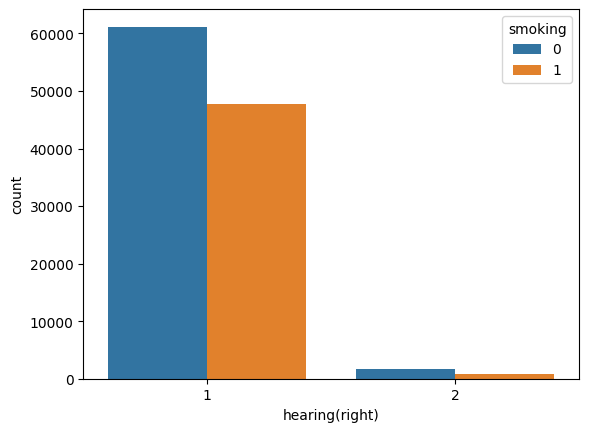

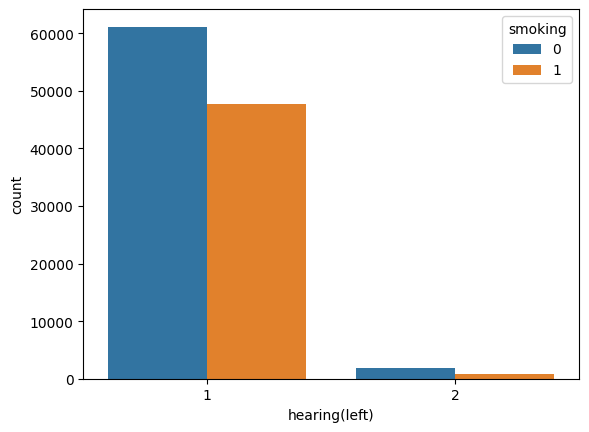

In [13]:
# Count of Discrete variables  
sns.countplot(data=training_data, x='hearing(right)', hue=target_column) # hearing(right)
plt.show()
sns.countplot(data=training_data, x='hearing(left)', hue=target_column) # hearing(left)
plt.show()

4. Box plot and Normal Distribution overlay for each Feature

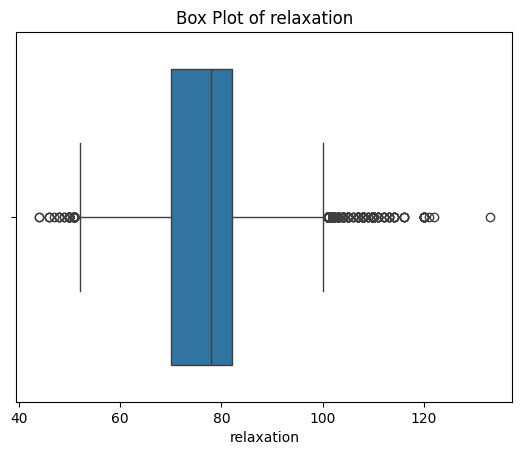

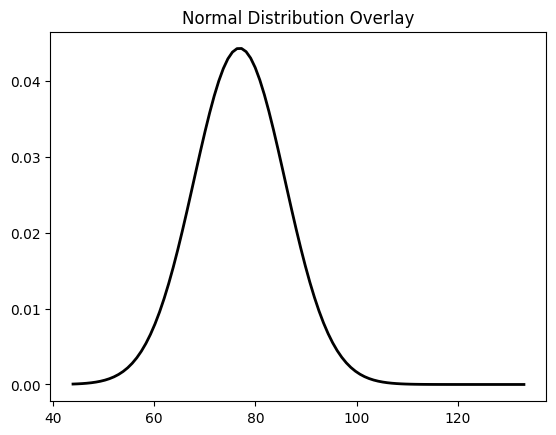

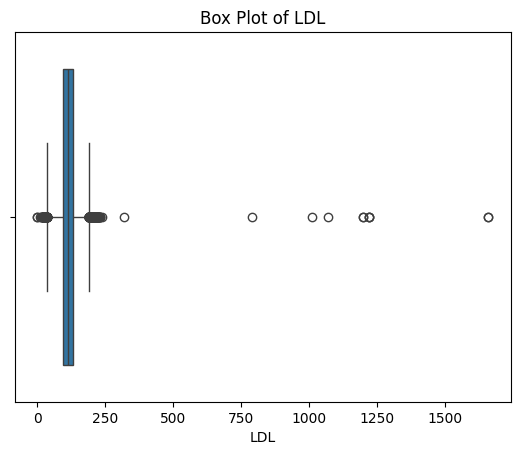

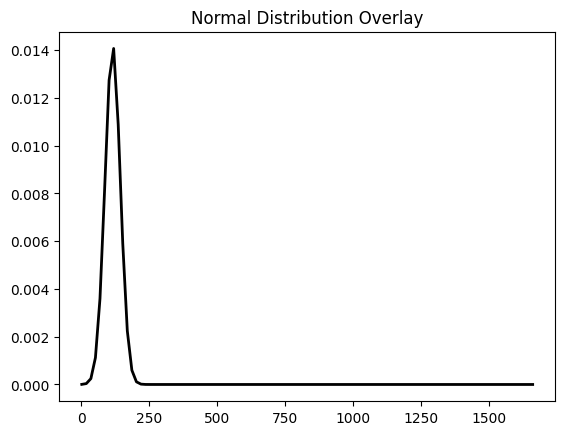

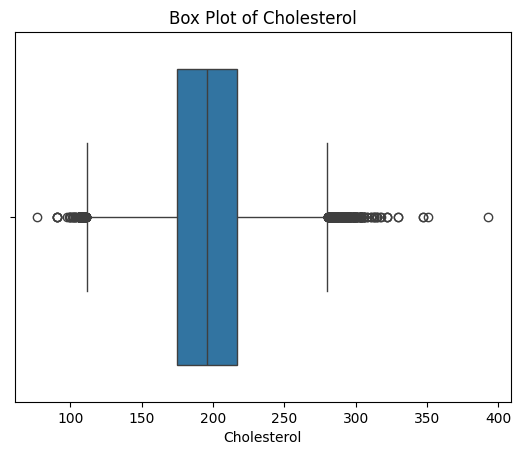

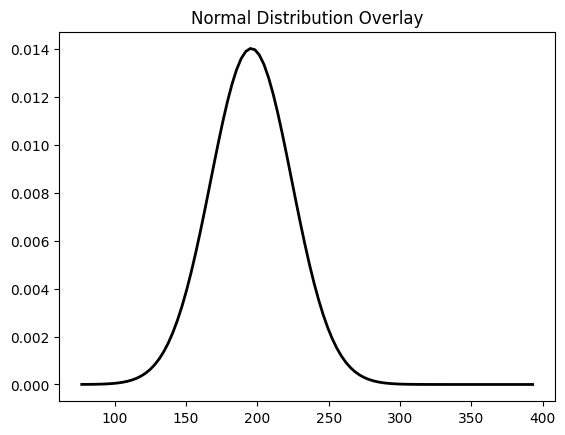

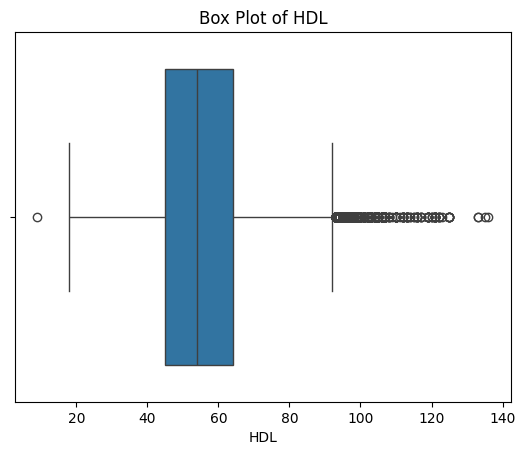

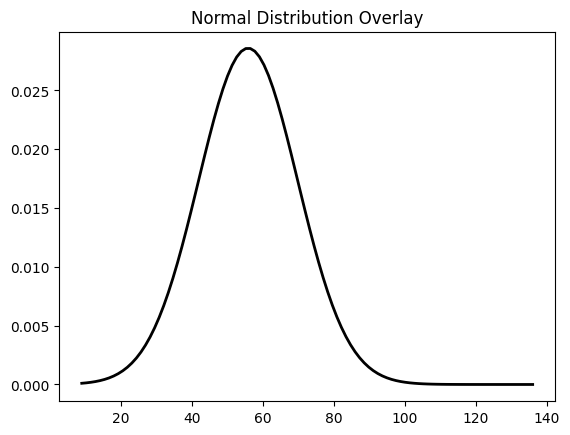

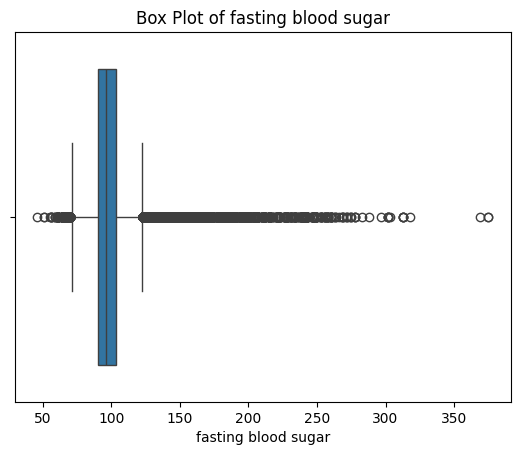

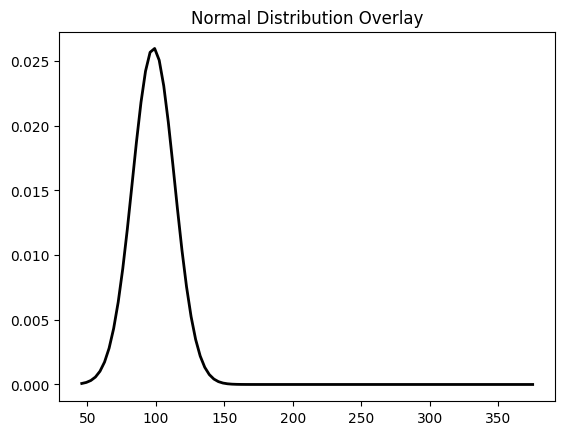

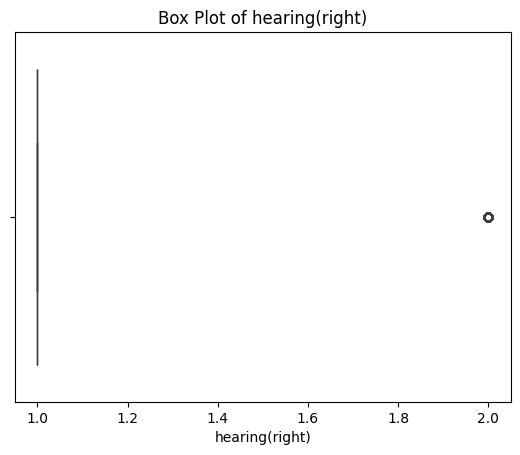

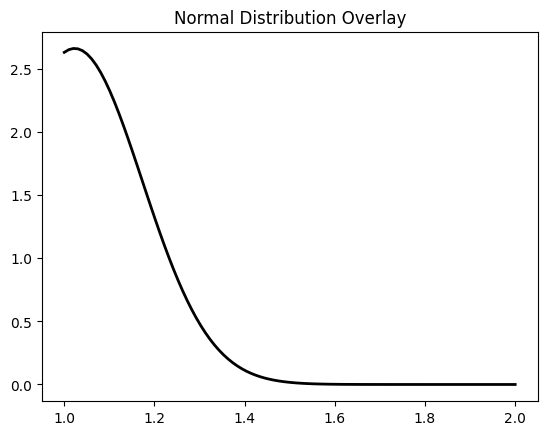

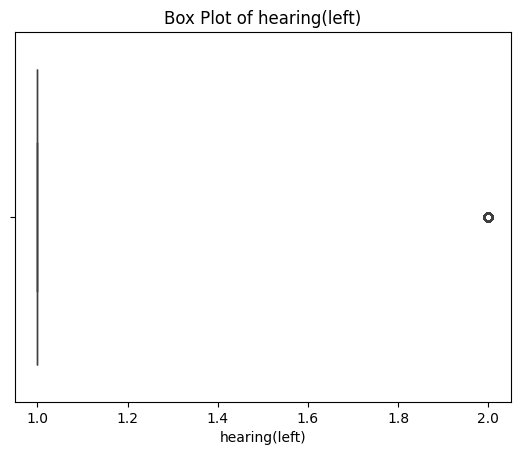

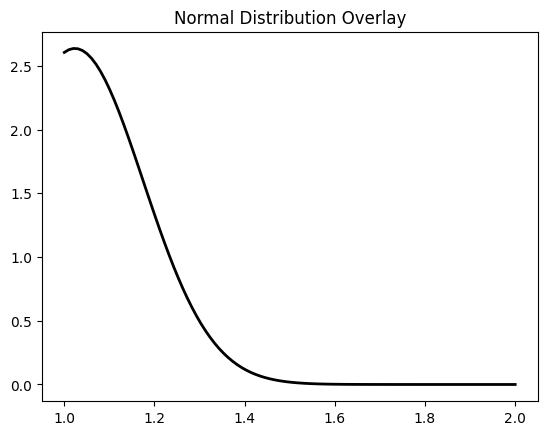

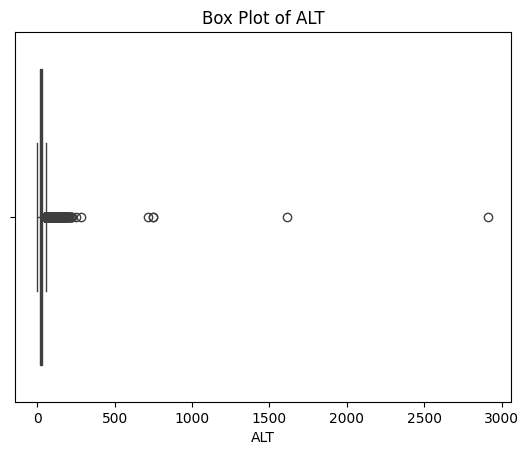

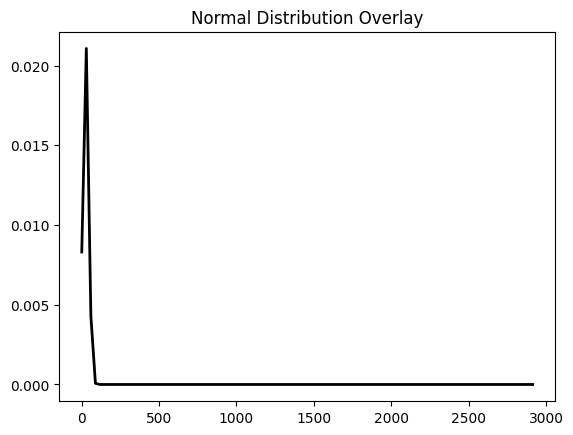

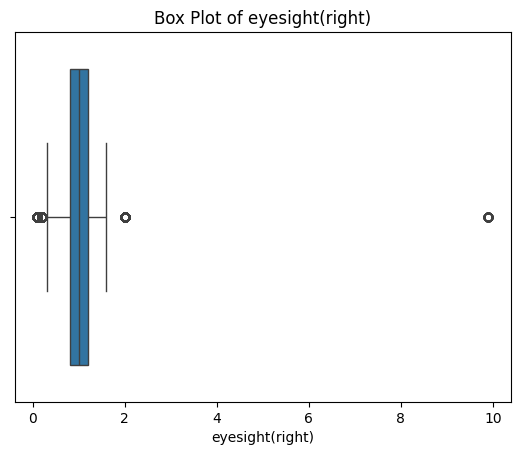

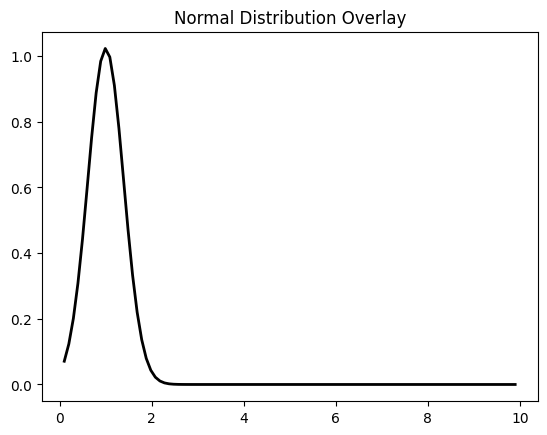

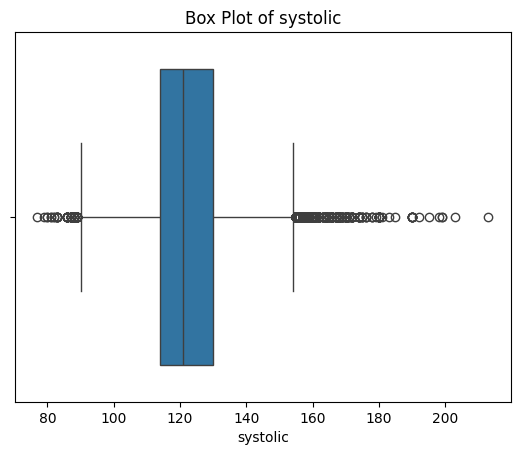

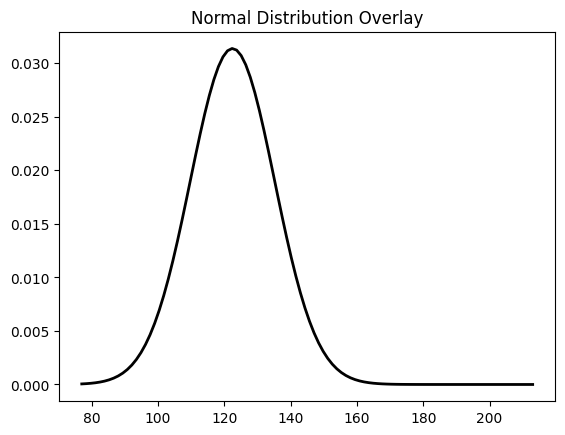

In [17]:
for column_for_analysis in columns:
    # Box pLot
    sns.boxplot(x=X_train[column_for_analysis])  
    plt.title(f'Box Plot of {column_for_analysis}')
    plt.show()

    # Normal distribution overlay
    x = np.linspace(np.min(X_train[column_for_analysis]), np.max(X_train[column_for_analysis]), 100)
    p = norm.pdf(x, np.mean(X_train[column_for_analysis]), np.std(X_train[column_for_analysis]))
    plt.plot(x, p, 'k-', linewidth=2)
    plt.title('Normal Distribution Overlay')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

* Bivariate Analysis
    1. Correaltion Matrix

In [18]:
# Calculate Correlations between each two features
corrmat = X_train.corr()
corrmat

relaxation       LDL  Cholesterol       HDL  \
relaxation             1.000000  0.074110     0.101830 -0.125771   
LDL                    0.074110  1.000000     0.810205 -0.089096   
Cholesterol            0.101830  0.810205     1.000000  0.165775   
HDL                   -0.125771 -0.089096     0.165775  1.000000   
fasting blood sugar    0.152738  0.010580     0.029127 -0.127116   
hearing(right)        -0.016621 -0.013286    -0.030985 -0.004104   
hearing(left)         -0.010777 -0.012624    -0.030877 -0.004050   
ALT                    0.123730  0.074299     0.068694 -0.207087   
eyesight(right)        0.017583 -0.019422    -0.014705 -0.048852   
systolic               0.753775  0.052100     0.070257 -0.116581   

                     fasting blood sugar  hearing(right)  hearing(left)  \
relaxation                      0.152738       -0.016621      -0.010777   
LDL                             0.010580       -0.013286      -0.012624   
Cholesterol                     0.029127       -0.030985      -0.030877   
HDL                            -0.127116       -0.004104      -0.004050   
fasting blood sugar             1.000000        0.027175       0.024978   
hearing(right)                  0.027175        1.000000       0.552117   
hearing(left)                   0.024978        0.552117       1.000000   
ALT                             0.078327       -0.032320      -0.031991   
eyesight(right)                -0.045105       -0.080245      -0.073322   
systolic                        0.174172        0.040871       0.042443   

                          ALT  eyesight(right)  systolic  
relaxation           0.123730         0.017583  0.753775  
LDL                  0.074299        -0.019422  0.052100  
Cholesterol          0.068694        -0.014705  0.070257  
HDL                 -0.207087        -0.048852 -0.116581  
fasting blood sugar  0.078327        -0.045105  0.174172  
hearing(right)      -0.032320        -0.080245  0.040871  
hearing(left)       -0.031991        -0.073322  0.042443  
ALT                  1.000000         0.071991  0.106551  
eyesight(right)      0.071991         1.000000 -0.026491  
systolic             0.106551        -0.026491  1.000000

2. Heatmap Plot

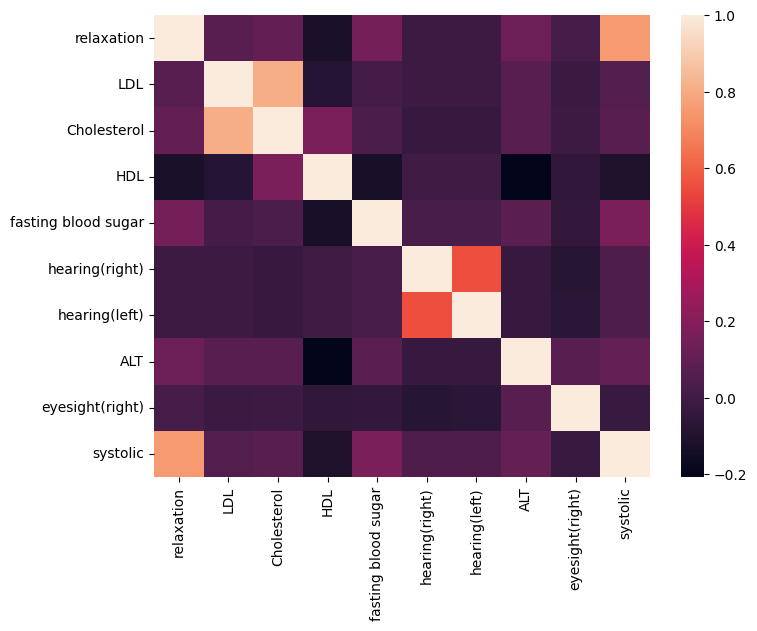

In [19]:
# plot heatmap
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
sns.heatmap(corrmat, vmax=1., square=False)
plt.show()

3. Most Highly 10 Correlated Features

In [20]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(X_train, 10)

FirstVariable       SecondVariable  Correlation
0                  LDL          Cholesterol     0.810205
1           relaxation             systolic     0.753775
2       hearing(right)        hearing(left)     0.552117
3                  HDL                  ALT    -0.207087
4  fasting blood sugar             systolic     0.174172
5          Cholesterol                  HDL     0.165775
6           relaxation  fasting blood sugar     0.152738
7                  HDL  fasting blood sugar    -0.127116
8           relaxation                  HDL    -0.125771
9           relaxation                  ALT     0.123730

4. Means of Features grouped by target

In [31]:
# Means of each feature grouped by target 
print("Means")
mean = training_data.groupby(by=target_column).agg('mean')[columns]
mean

Means


relaxation         LDL  Cholesterol        HDL  fasting blood sugar  \
smoking                                                                        
0         75.968085  116.360459   197.073764  59.210086            96.975730   
1         78.000227  112.292574   194.095774  51.509349           100.055702   

         hearing(right)  hearing(left)        ALT  eyesight(right)    systolic  
smoking                                                                         
0              1.027703       1.028228  23.979529         0.962465  121.771413  
1              1.016886       1.017256  29.912854         1.050301  123.331679

4. Standard Deviation of Features grouped by target

In [32]:
# Standard Deviations of each feature grouped by target 
print("\nStandard Deviations")
std = training_data.groupby(by=target_column)[columns].agg('std')
std


Standard Deviations


relaxation        LDL  Cholesterol        HDL  fasting blood sugar  \
smoking                                                                       
0          9.246363  29.119892    29.147137  14.476810            14.055702   
1          8.540978  26.560192    27.375038  11.914972            16.697264   

         hearing(right)  hearing(left)        ALT  eyesight(right)   systolic  
smoking                                                                        
0              0.164122       0.165624  14.153484         0.408525  13.352399  
1              0.128844       0.130226  22.549745         0.357814  11.773529

5. Scatter plots for each two consecutive features

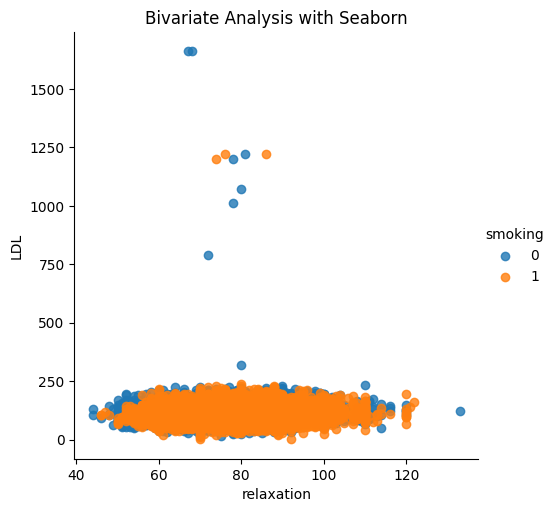

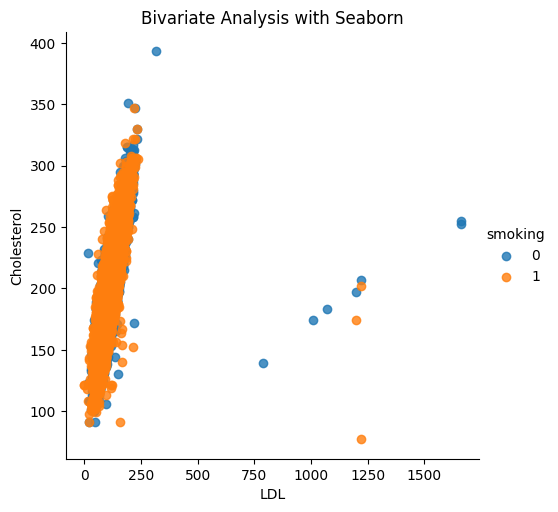

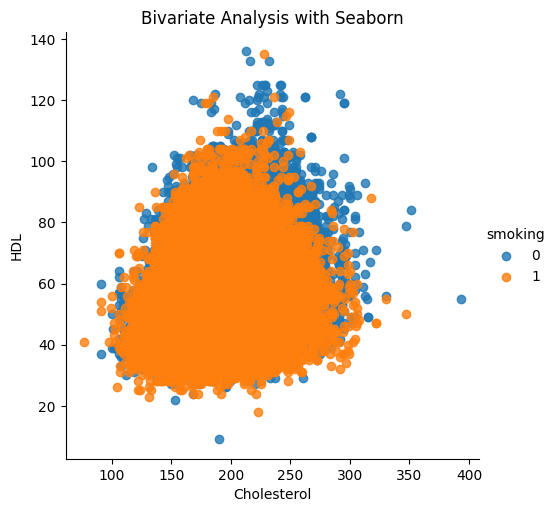

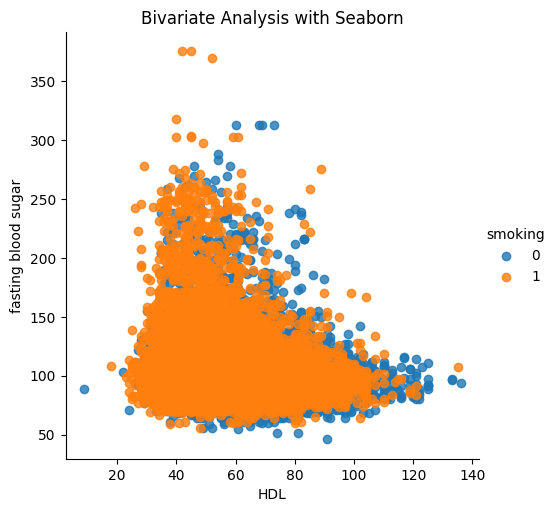

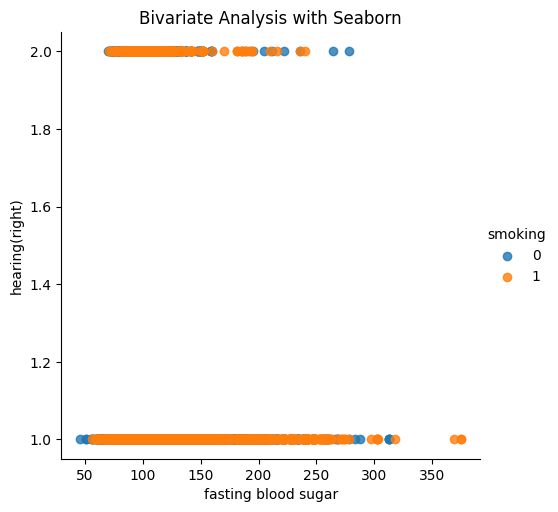

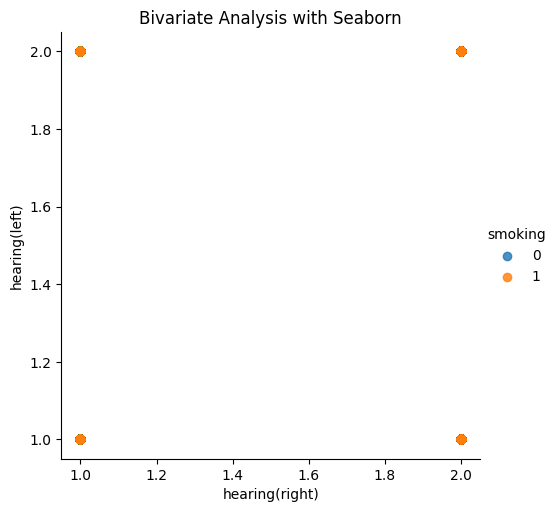

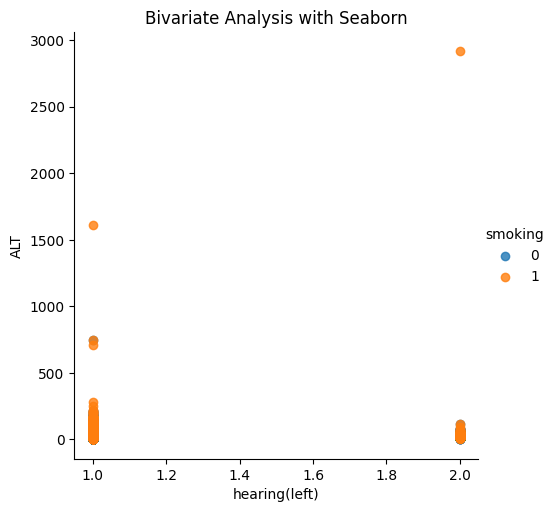

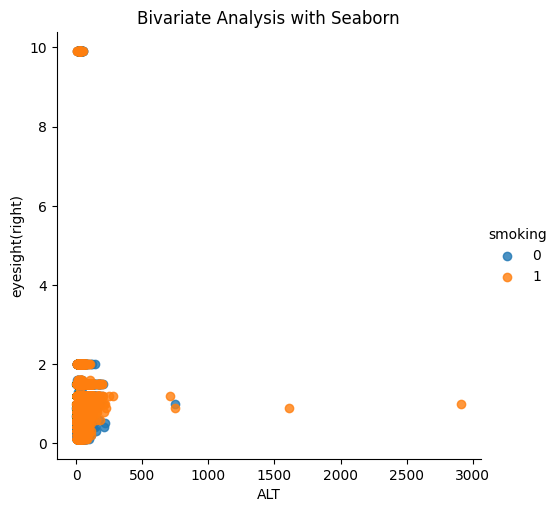

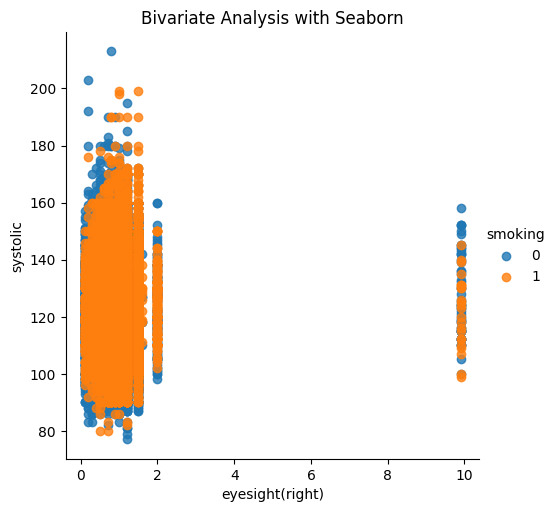

In [26]:
# Drawing Scatter plots for each two features
for i in range(0,len(columns)-1):
   sns.lmplot(x=columns[i], y=columns[i+1], data=training_data, hue=target_column, fit_reg=False)
   plt.title('Bivariate Analysis with Seaborn')
   plt.show()

Multivariate Analysis
1. Sample Sizes grouped by the target

In [28]:
data_groupby = X_train.groupby(y_train)
print("\nSample sizes:")
display(pd.DataFrame(data_groupby.apply(len)))


Sample sizes:


0
smoking       
0        62917
1        48562

2. Pair PLot of all Data

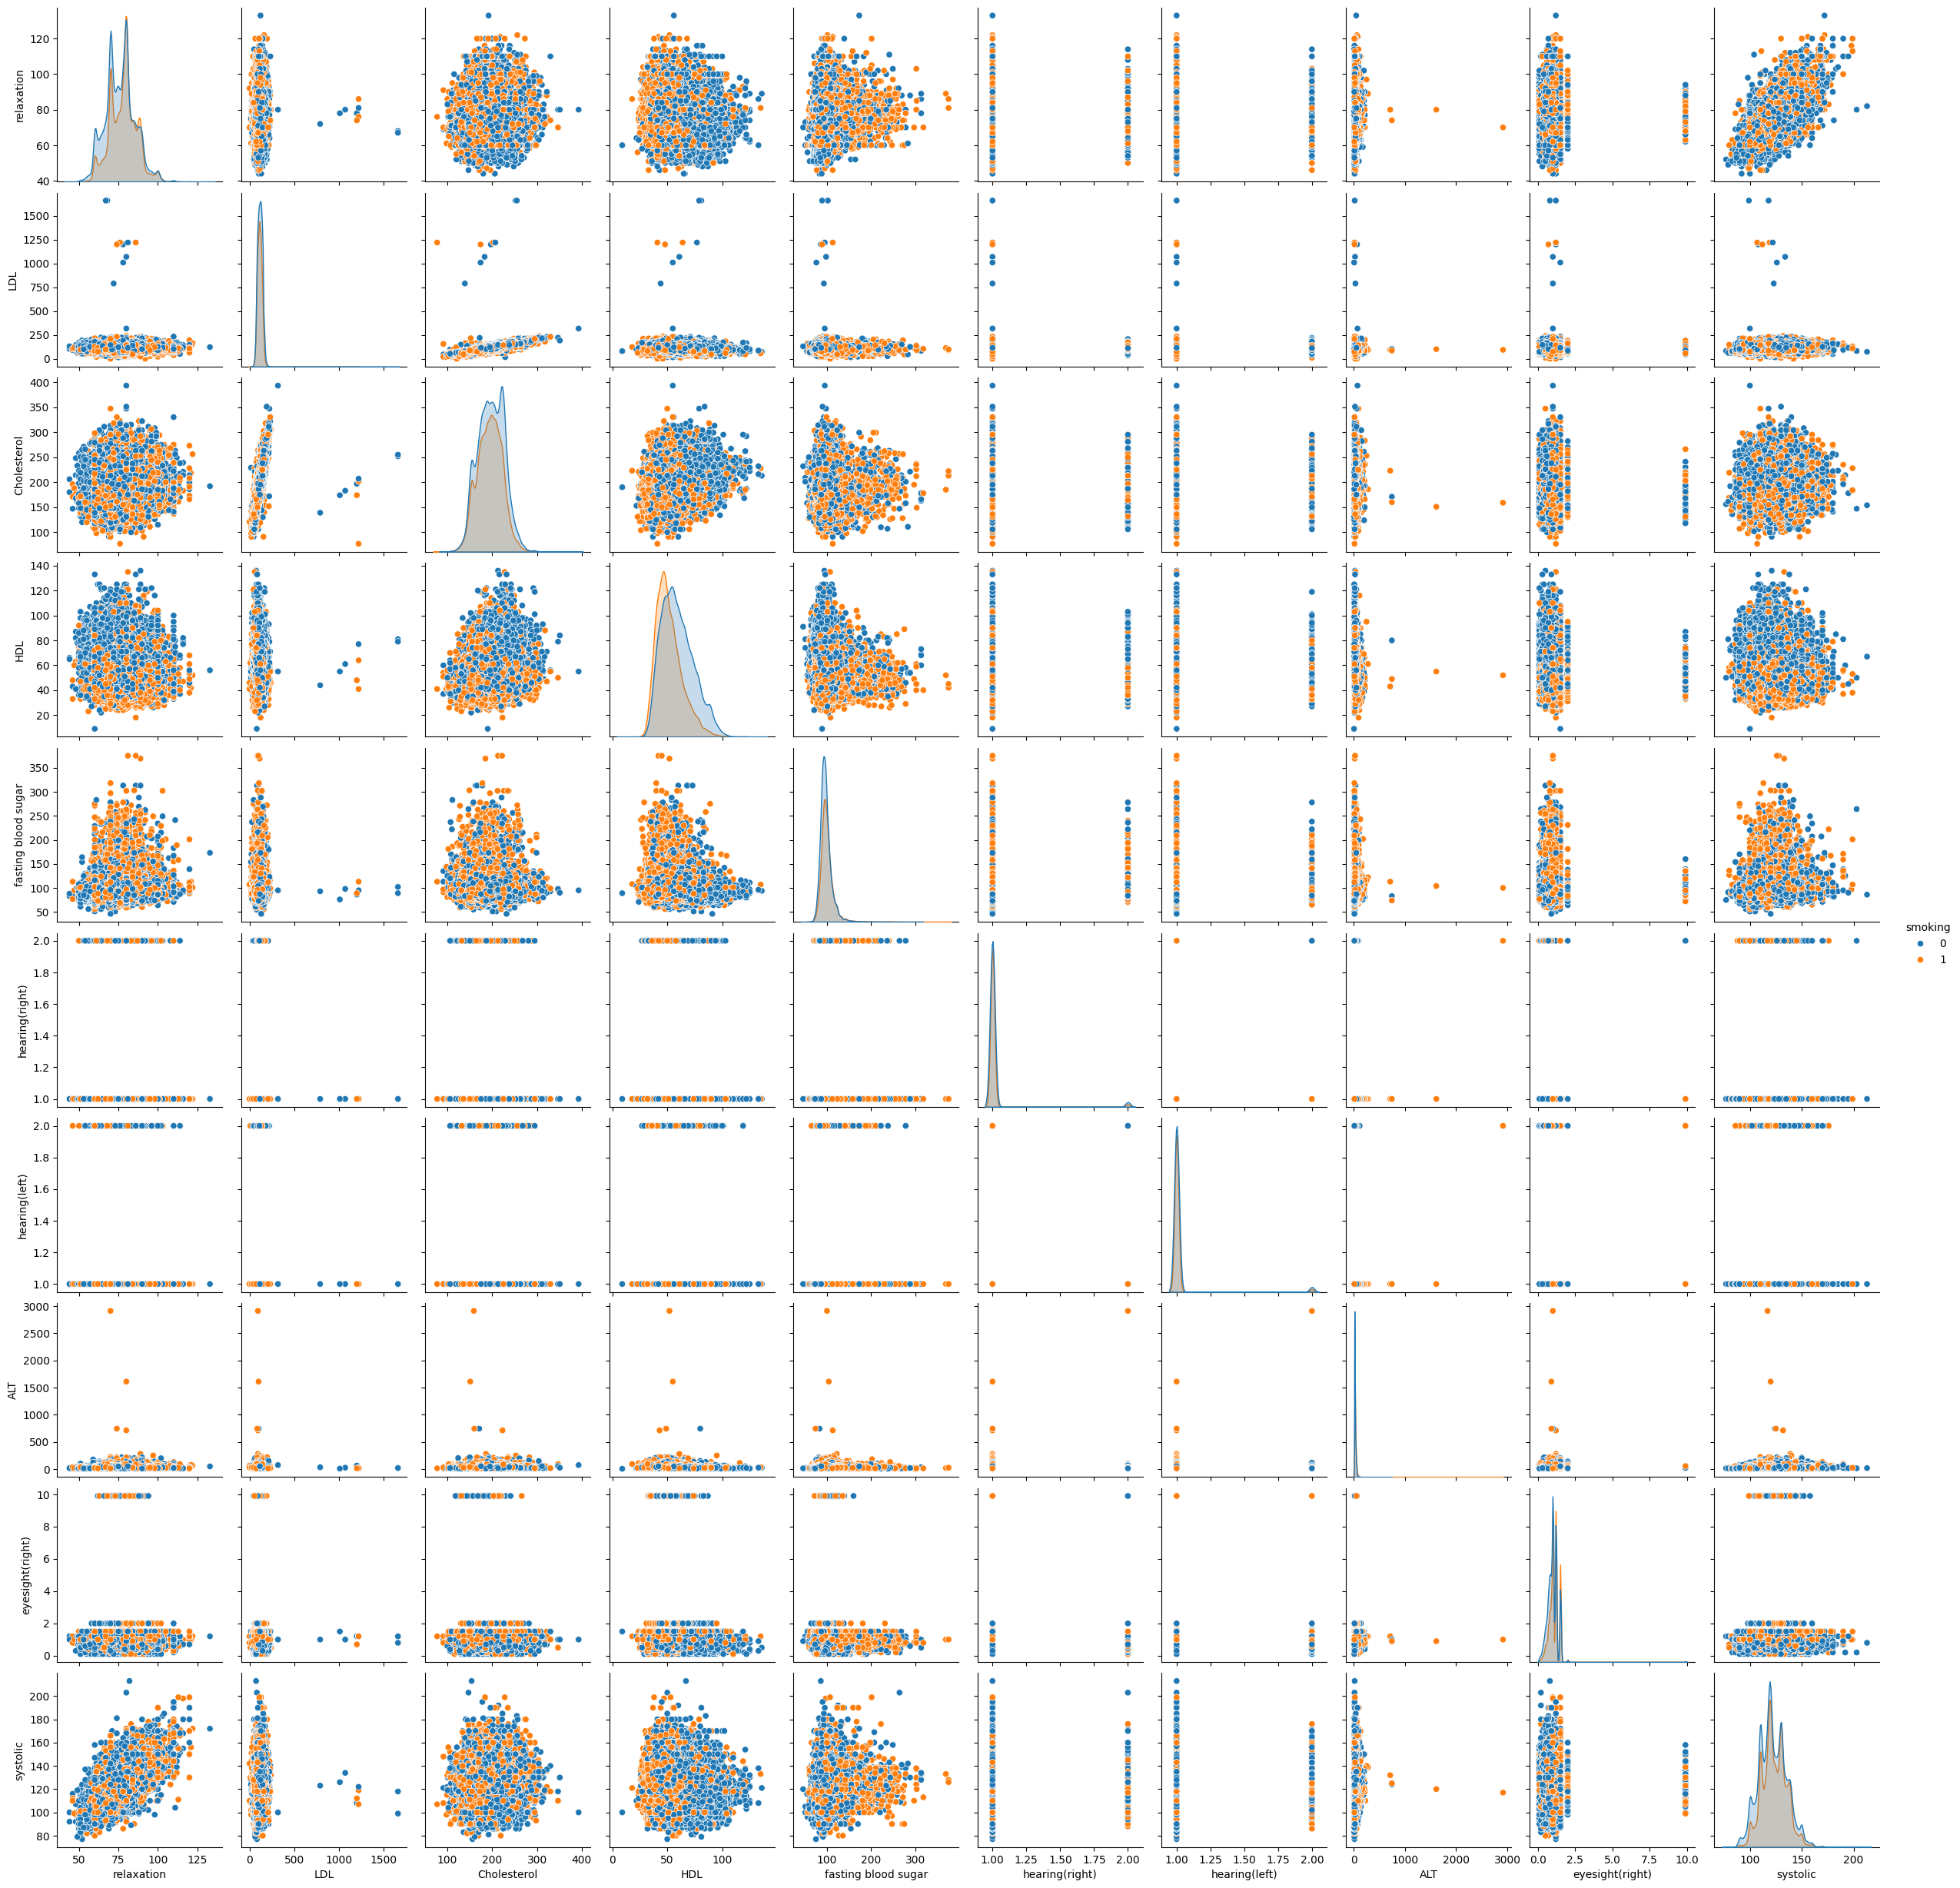

In [33]:
# Pair plot all data
sns.pairplot(data=training_data, hue=target_column)

3. Plot all Features Data

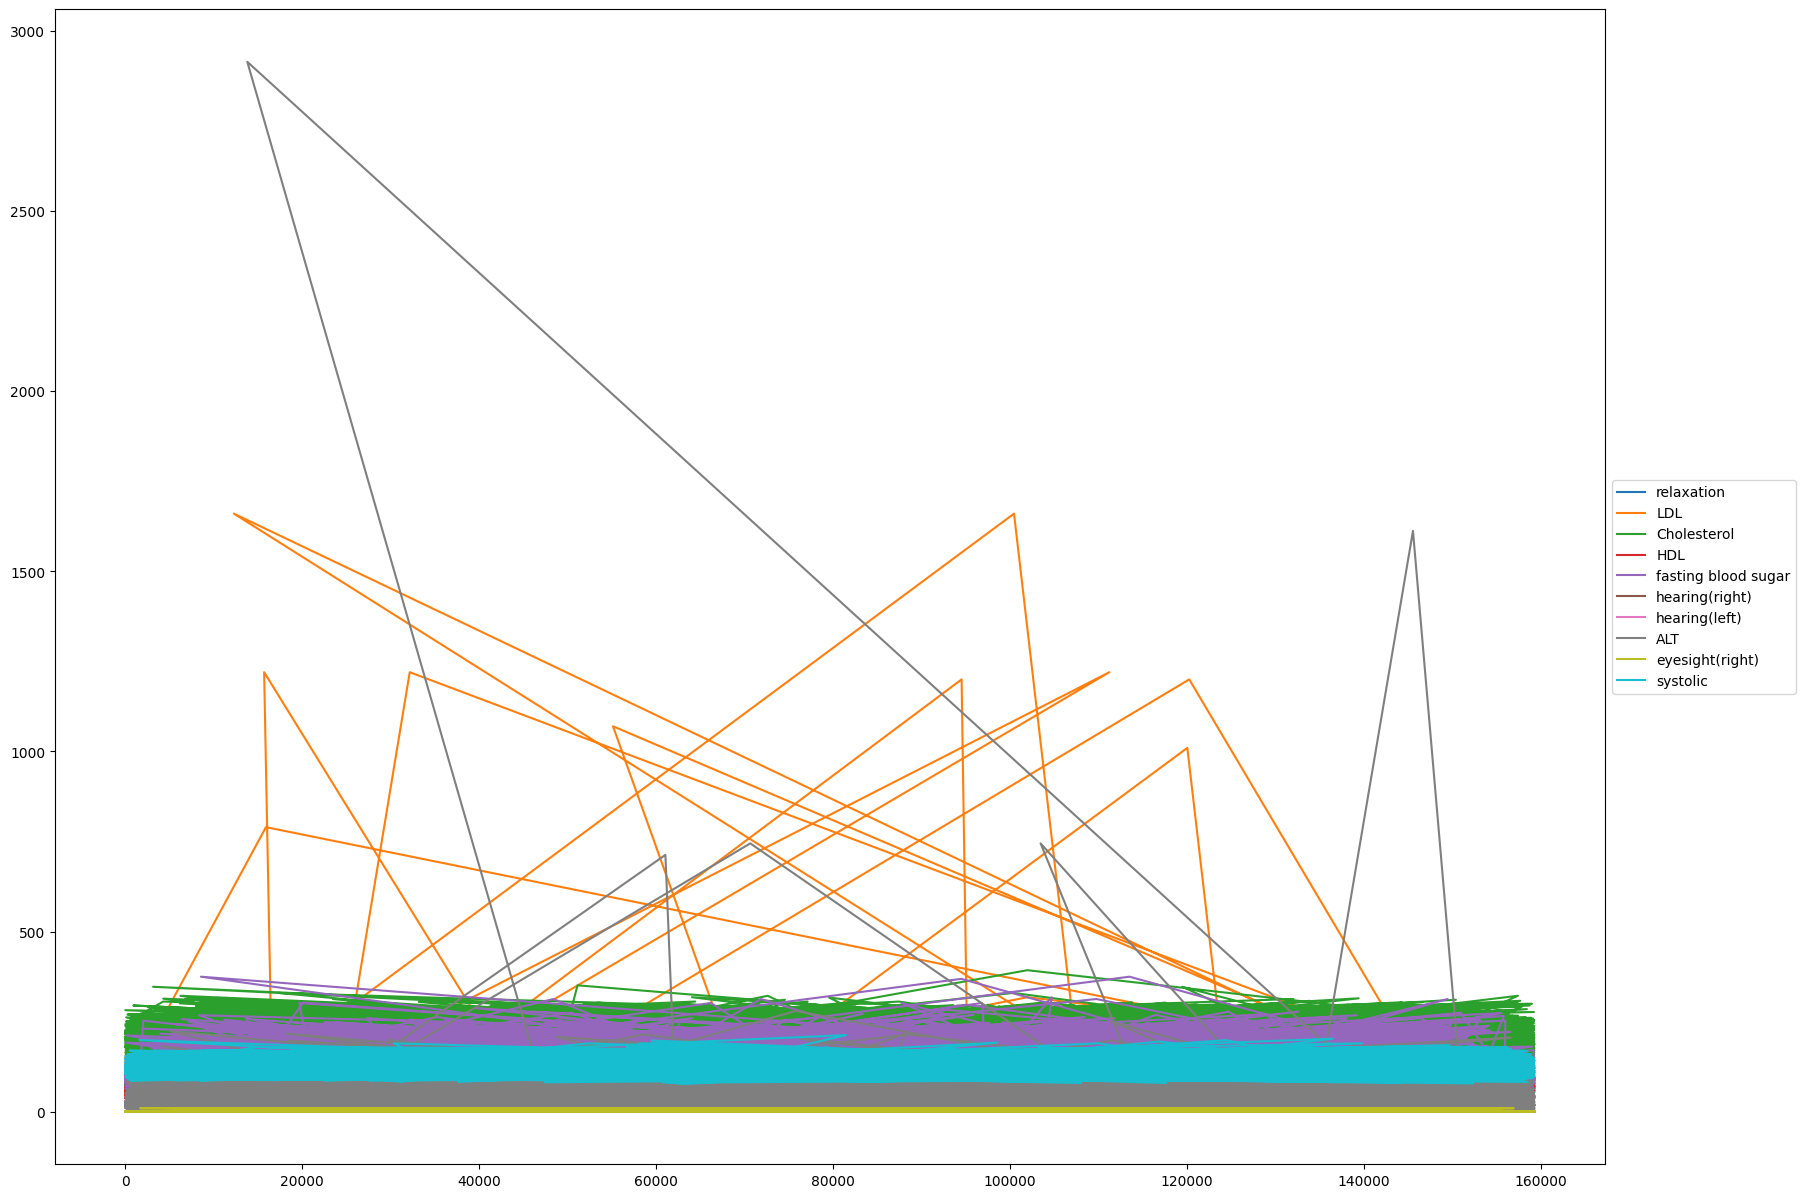

In [34]:
# plot all features data
ax = X_train[columns].plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

4. Plot First 5 Features Data

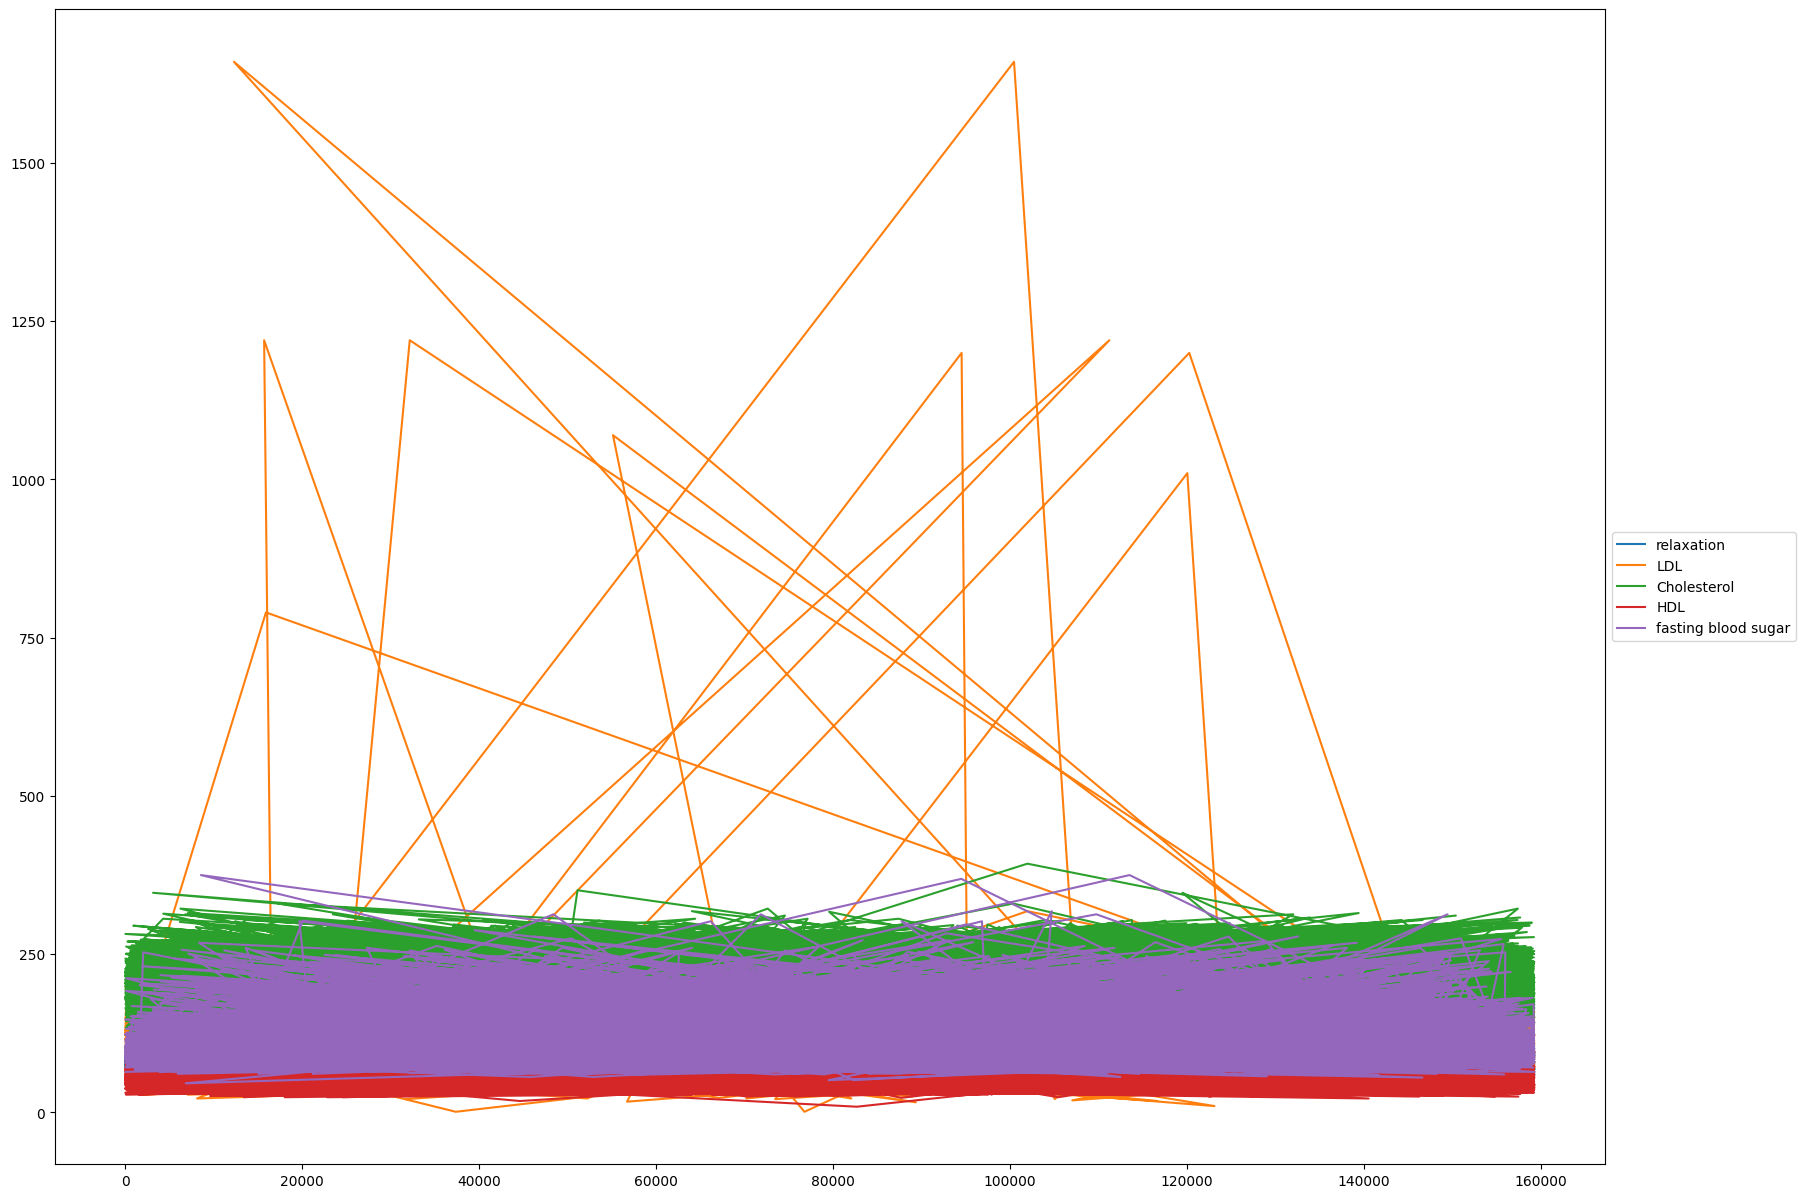

In [35]:
# plot first 5 features data 
ax = X_train[columns[0:5]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

5. Plot Last 5 Features Data

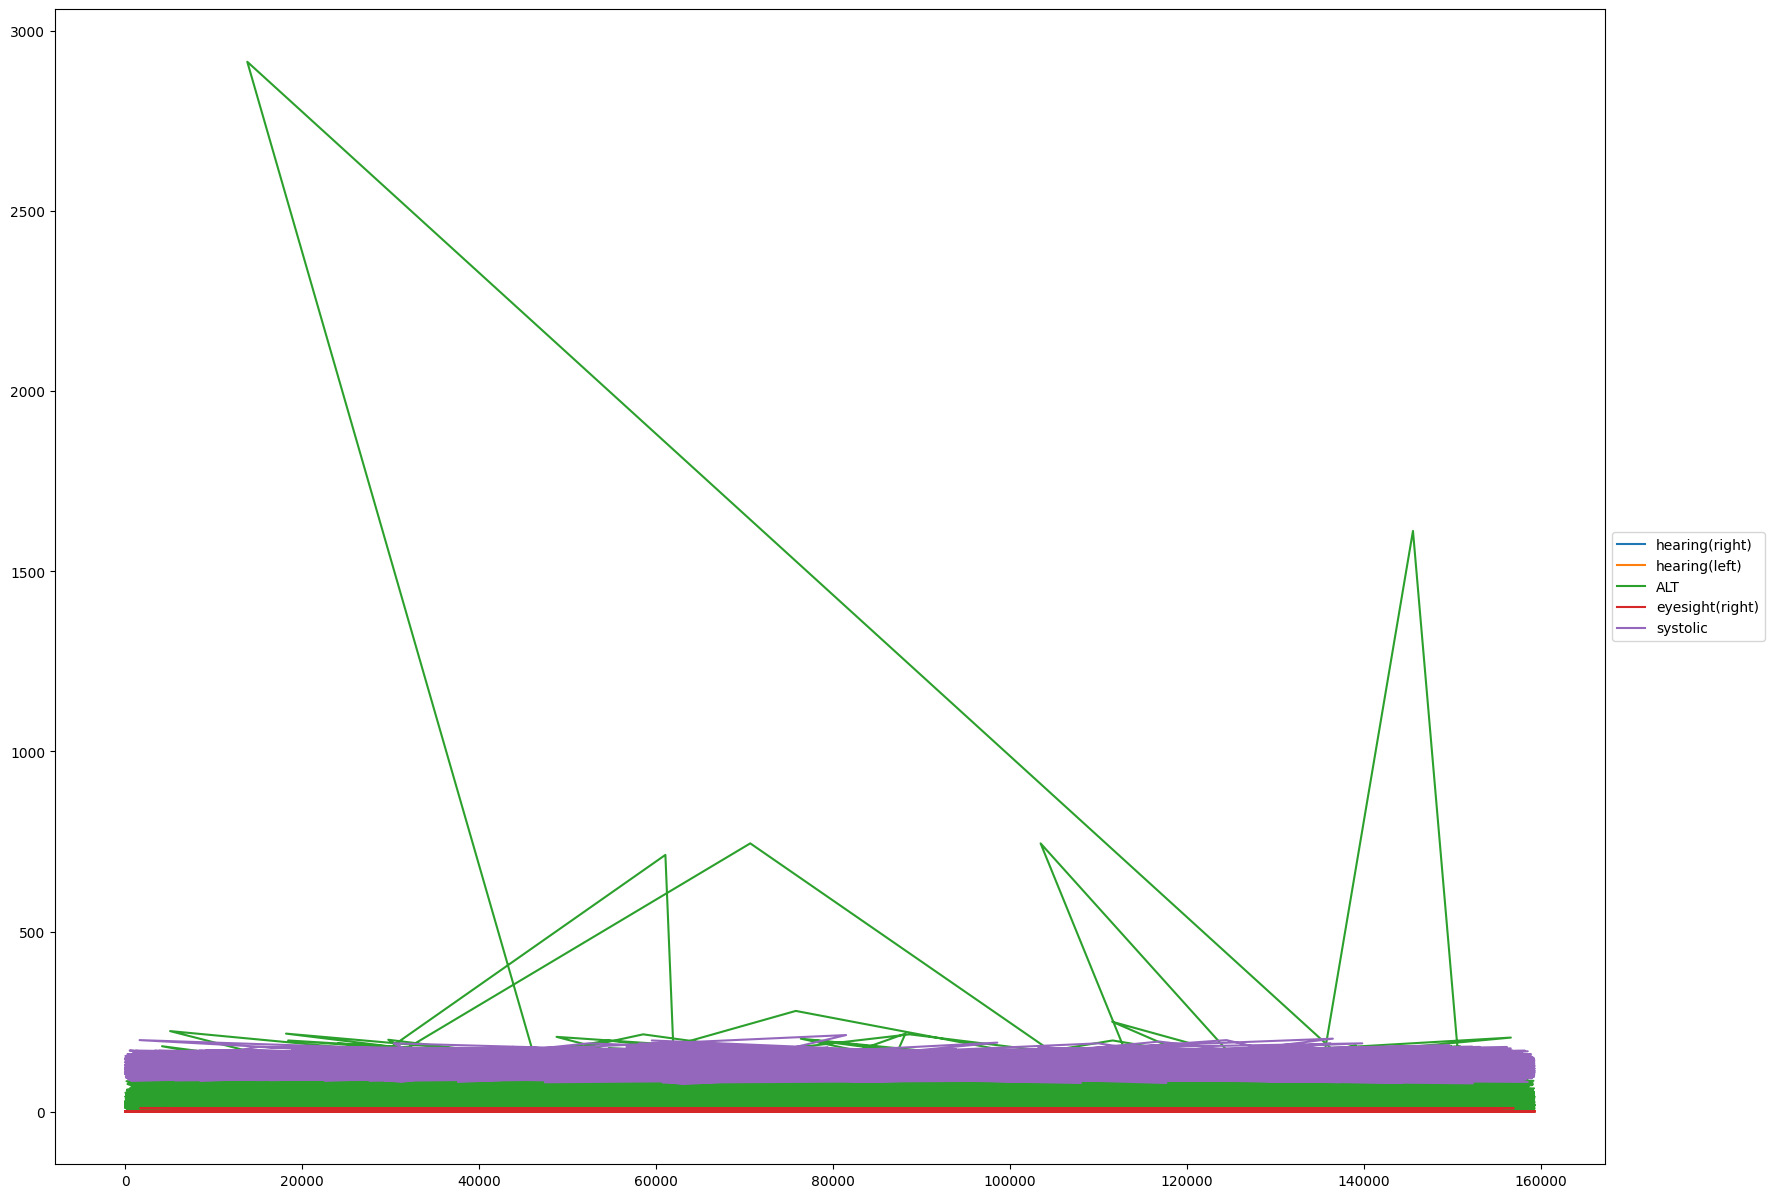

In [36]:
# plot last 5 features data
ax = X_train[columns[5:10]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Feature Engineering:

* Different Types of Normalization
1. Min-Max Scaling 

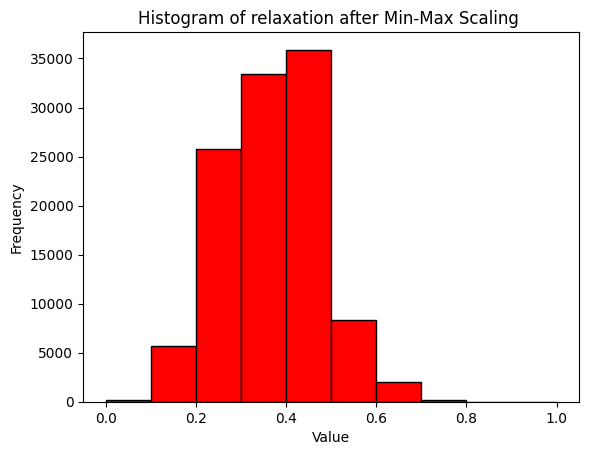

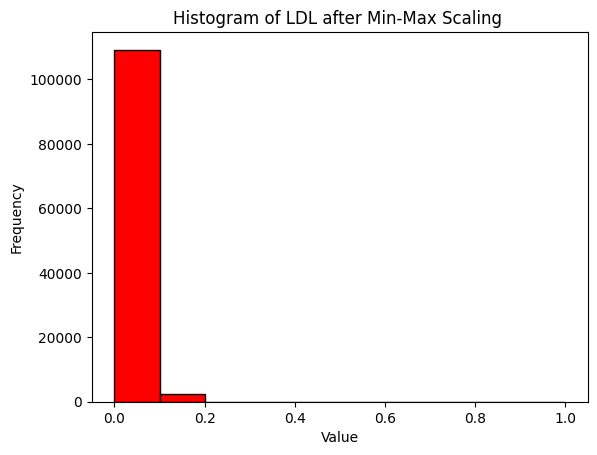

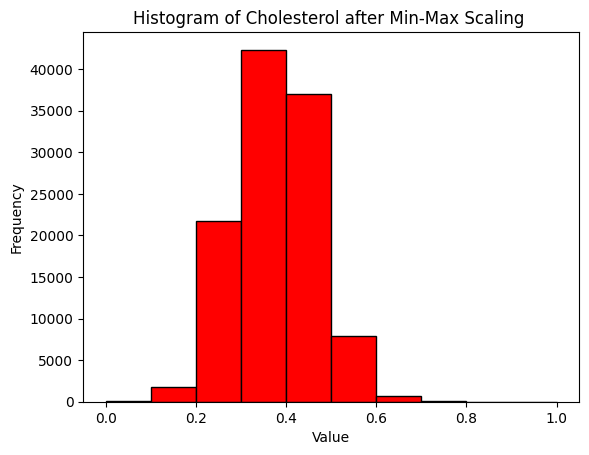

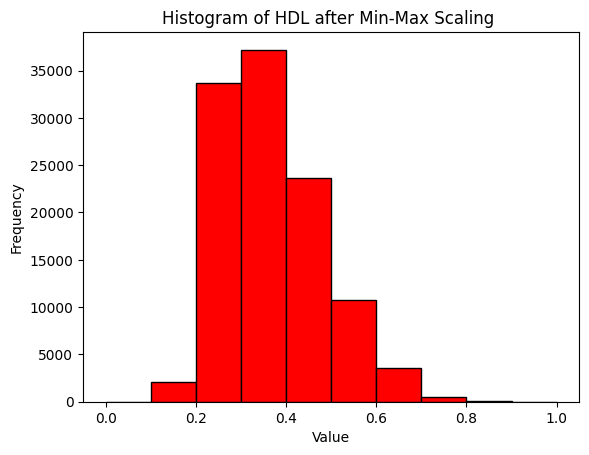

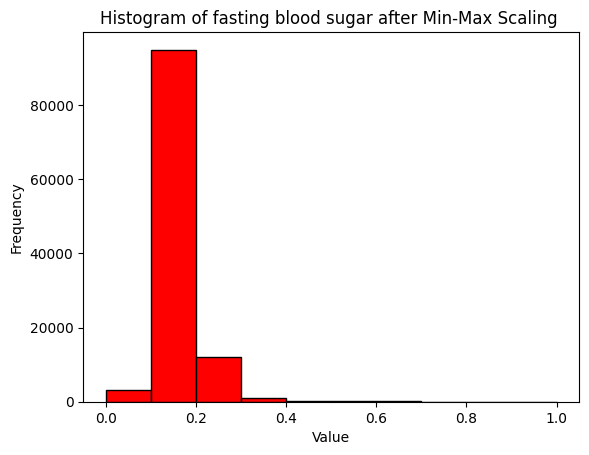

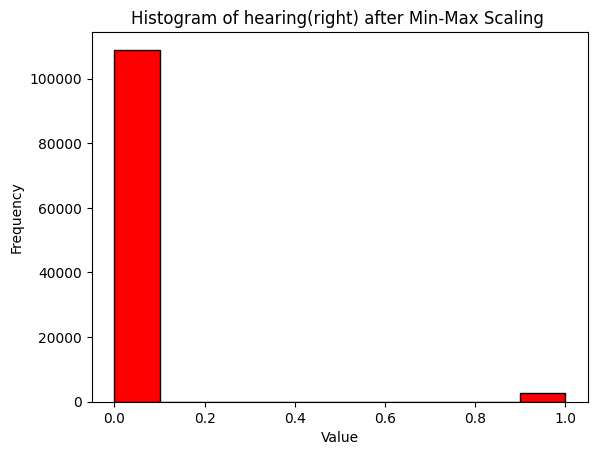

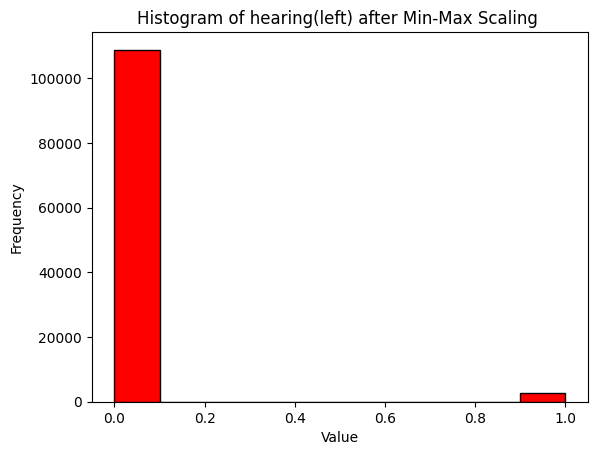

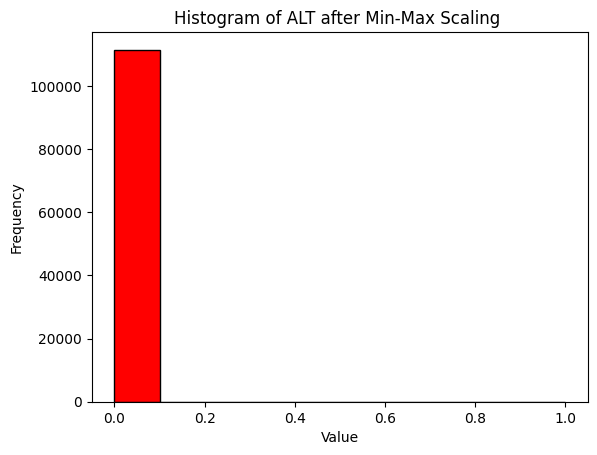

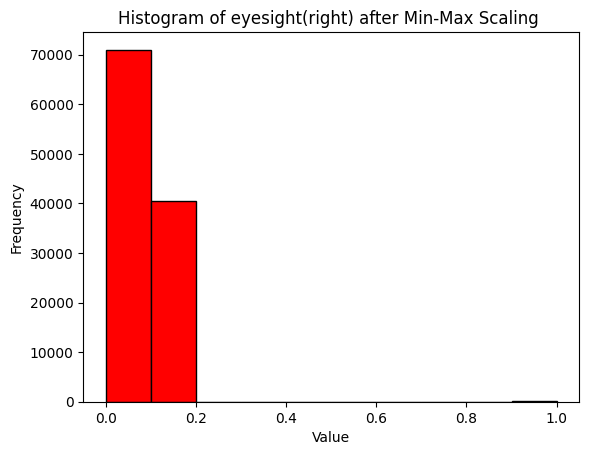

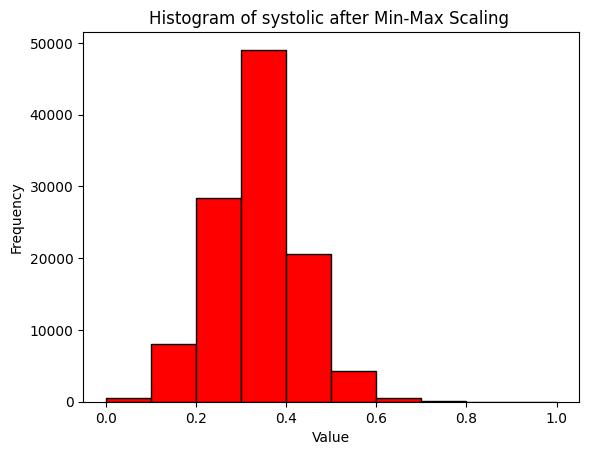

In [6]:
#Using Scikit-Learn for Normalization:
# Min-Max Scaling (get min and max and do x-xmin/xmax-xmin)
X_scaled = pd.DataFrame(X_train)
scaler_minmax = MinMaxScaler()
for column_for_analysis in columns:
    X_scaled[column_for_analysis] = scaler_minmax.fit_transform(X_scaled[[column_for_analysis]])
    plt.figure()
    plt.hist(X_scaled[column_for_analysis], bins=10, color='red', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_for_analysis} after Min-Max Scaling ')    
first_normalized_output_path = "1-Min-Max_Scaled_data.csv"  
X_scaled.to_csv(first_normalized_output_path)  

2. Z-Score Normalization

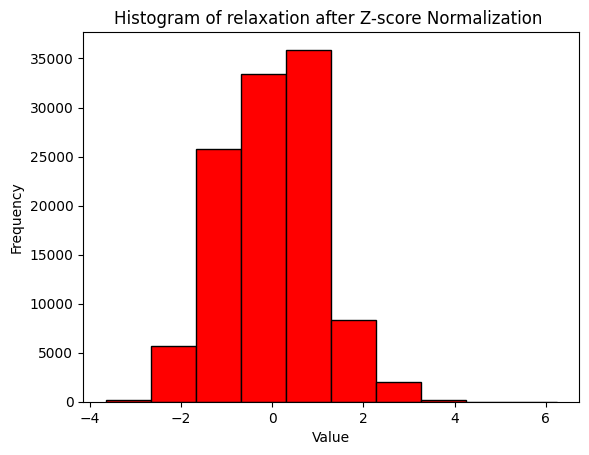

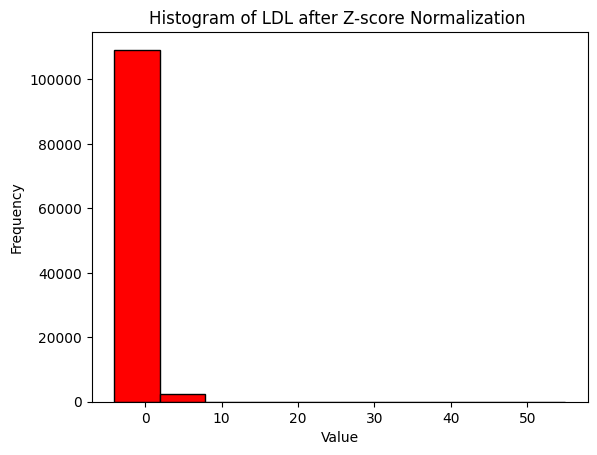

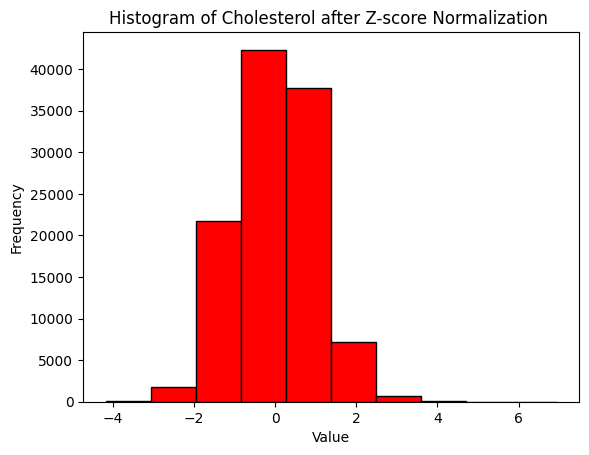

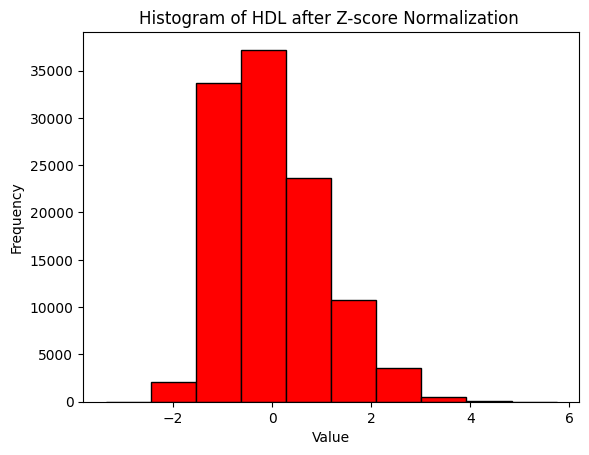

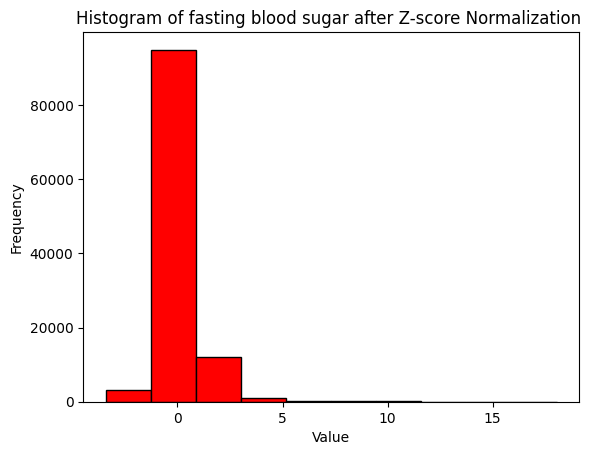

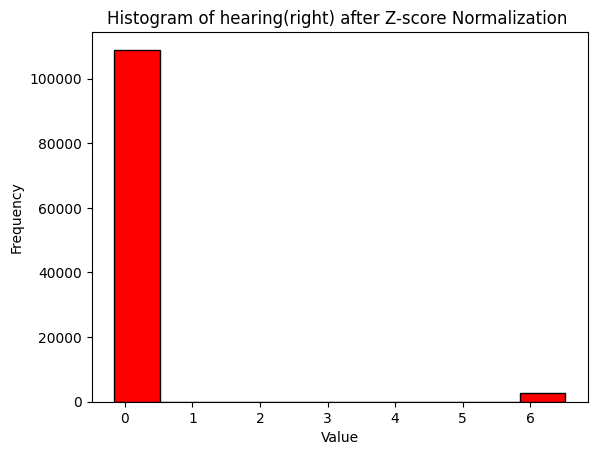

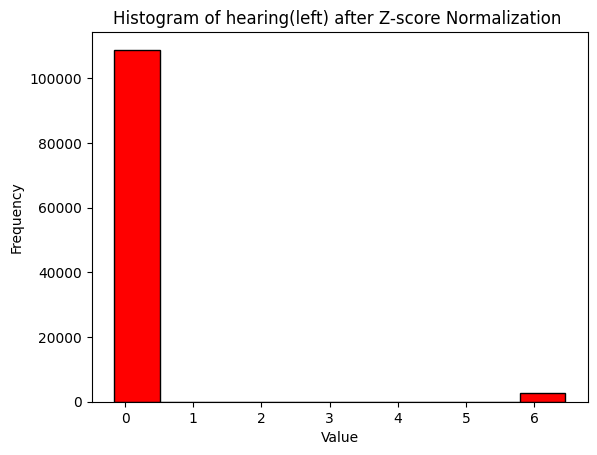

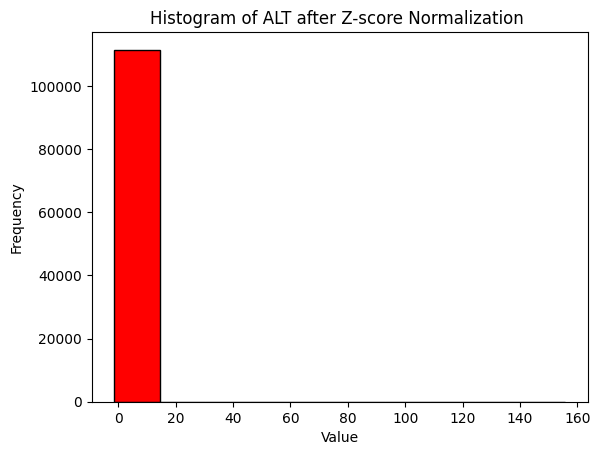

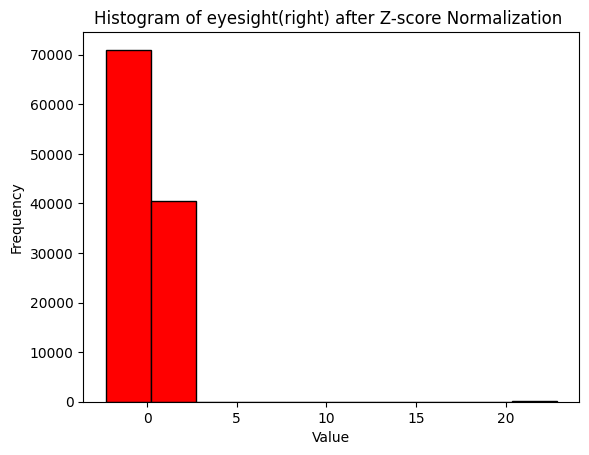

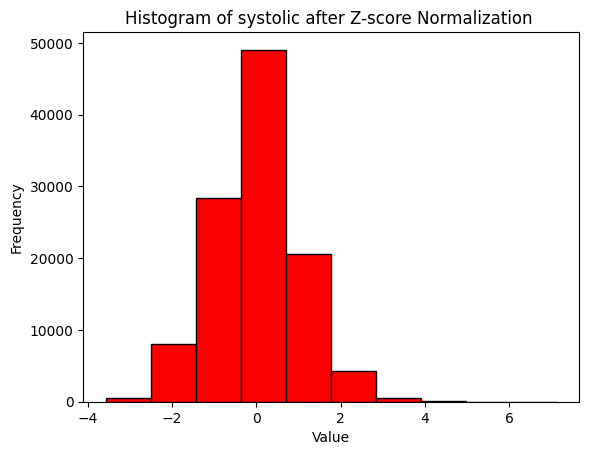

In [7]:
# Z-score Normalization(get mean and stander deviation and do x-mean/stander deviation)
X_standaralized = pd.DataFrame(X_train)
scaler_zscore = StandardScaler()
for column_for_analysis in columns:
    X_standaralized[column_for_analysis] = scaler_zscore.fit_transform(X_standaralized [[column_for_analysis]])
    plt.figure()
    plt.hist(X_standaralized [column_for_analysis], bins=10, color='red', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_for_analysis} after Z-score Normalization ')
Second_normalized_output_path = "2-Z-Score_Normalized_data.csv" 
X_standaralized .to_csv(Second_normalized_output_path)

3. MaxAbs Normalization

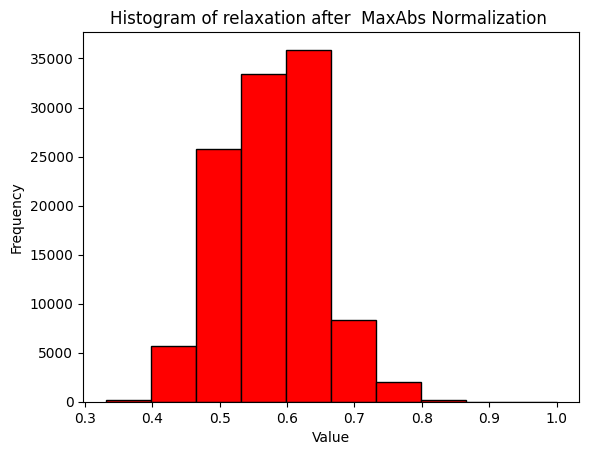

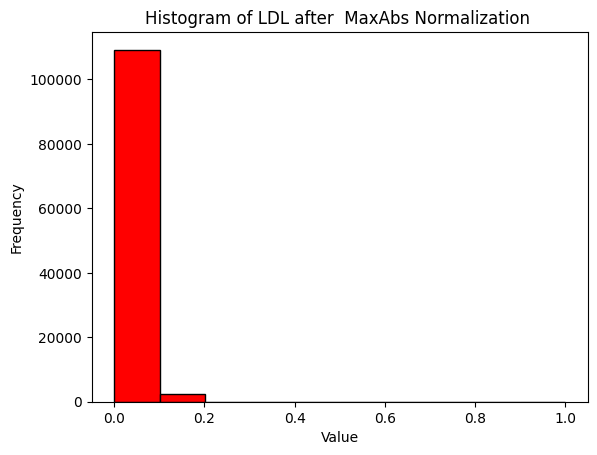

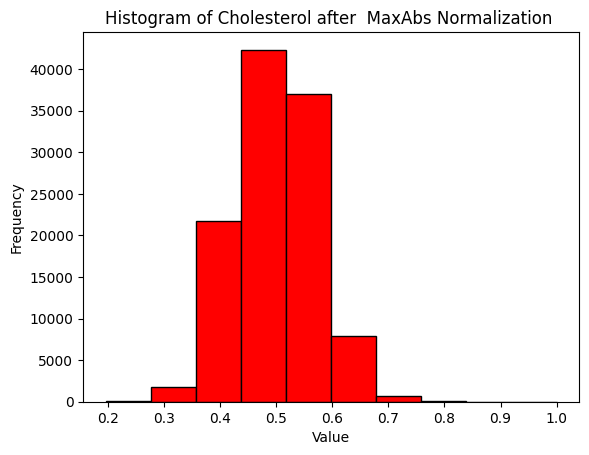

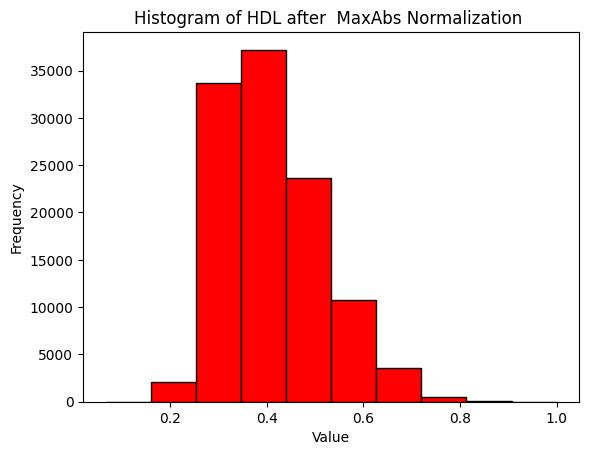

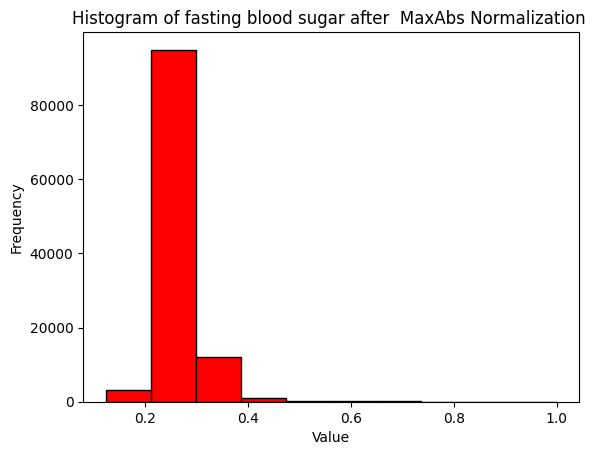

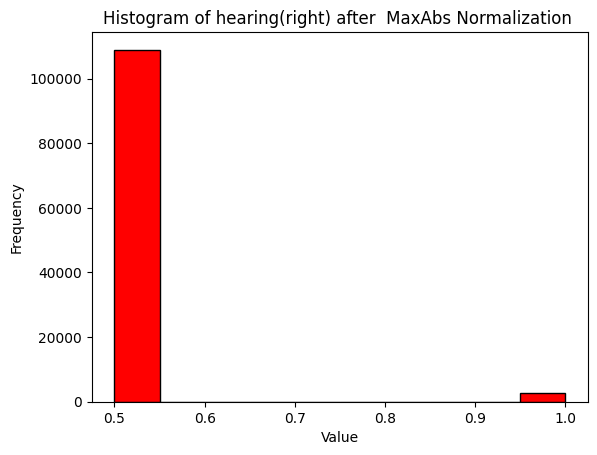

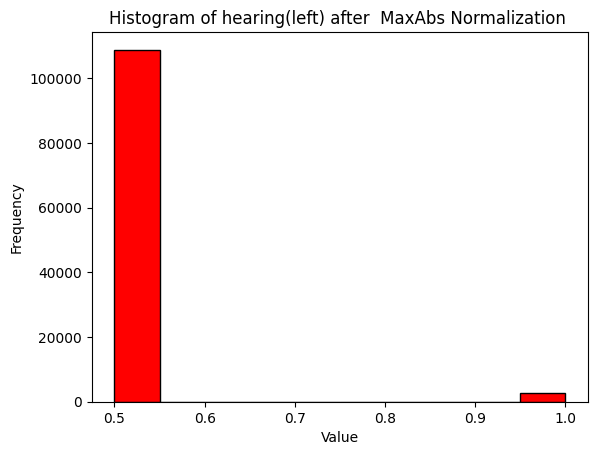

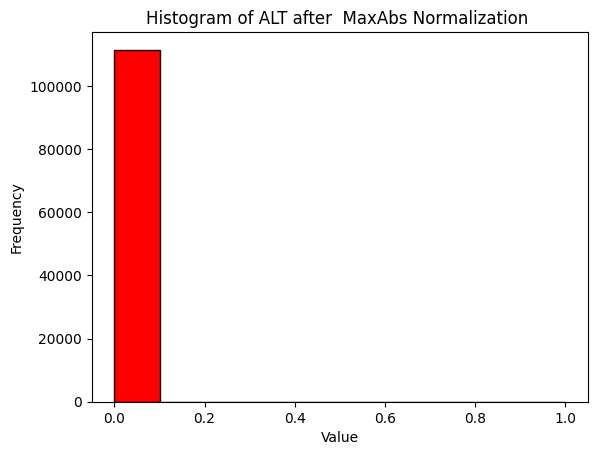

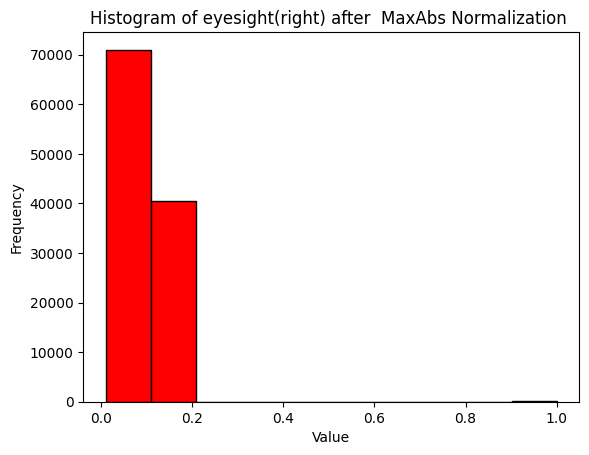

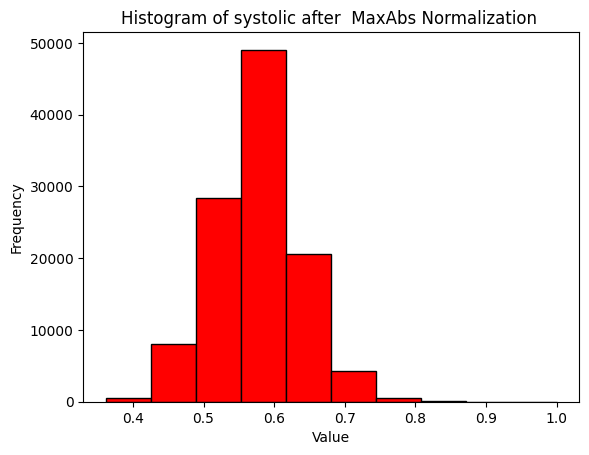

In [8]:
# MaxAbs Normalization (divide x on abs max value of x)
X_MaxAbsNorm = pd.DataFrame(X_train)
scaler = MaxAbsScaler()
for column_for_analysis in columns:
# Fit and transform the selected columns
    X_MaxAbsNorm[column_for_analysis]= scaler.fit_transform(X_MaxAbsNorm[[column_for_analysis]])
    plt.figure()
    plt.hist(X_MaxAbsNorm[column_for_analysis], bins=10, color='red', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_for_analysis} after  MaxAbs Normalization ')
third_normalized_output_path = "3-MaxAbs_Normalized_data.csv" 
X_MaxAbsNorm.to_csv(third_normalized_output_path) 

4. Normalization using Normalizer

In [9]:
# Normalization using Normalizer (scales each data point (row) independently to unit norm 
# (After normalization, each row will have a Euclidean norm of 1)x/||x2|| where x2 is eculiden norm of x)
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X_train)
X_normalized = pd.DataFrame(X_normalized)
fourth_normalized_output_path = "4-Normalizer_data.csv" 
X_normalized.to_csv(fourth_normalized_output_path)  